# Capstone - Nanodegree Udacity Engenheiro de Machine Learning

## Previsão de preço de licitação da matrícula de Xangai

## Escolhi o dataset Shanghai license plate bidding price prediction para construir o meu modelo do capstone. Esse é um dataset que pertence ao Kaggle.

O aumento da propriedade e uso de automóveis na China nas últimas duas décadas aumentou o consumo de energia, piora a poluição do ar e congestionamento exacerbado. O governo de Xangai adotou um sistema de leilão para limitar o número de placas emitidas para cada mês. O conjunto de dados contém dados históricos de leilões de janeiro de 2002 a outubro de 2017.

como funciona o sistema de leilão: um preço inicial é dado no início do leilão, os licitantes só podem oferecer até 3 vezes por cada leilão e só podem marcar para cima ou para baixo dentro de 300 CNY (aproximadamente 46 USD) por cada lance. No final de cada leilão, apenas o n superior (número de placas que serão emitidas para o mês) receberá as placas de licença ao custo de suas propostas. A oferta n. ° será o preço mais baixo do mês. Por favor, note que os leilões são realizados on-line e cada licitante não poderá ver outros lances.

Colunas:

Data: janeiro de 2002 a outubro de 2017 (observe que faltam em fevereiro de 2008)

* num_bidder *: número de cidadãos que participam do leilão para o mês

* num_plates *: número de placas que serão emitidas pelo governo para o mês

* low_deal_price *: explicado acima, em CNY

* avg_deal_price *: preço médio do negócio, no CNY (observe que, como cada lance só pode ser marcado para cima ou para baixo no prazo de 300, não está se afastando muito do preço mais baixo)

O objetivo é prever o preço low_deal_ para cada mês, o resultado real será atualizado no final de cada mês

o conjunto de dados é raspado de http://www.51chepai.com.cn/paizhaojiage/

Contato: ran_su147@hotmail.com

### Contexto

Xangai usa um sistema de leilões para vender um número limitado de matadouros para compradores de automóveis com combustível fóssil todos os meses. O preço médio desta placa de licença é de cerca de US $ 13.000 e muitas vezes é referido como "a peça de metal mais cara do mundo". Então, nosso objetivo é prever o preço médio ou o preço mais baixo para o próximo mês. Este conjunto de dados será atualizado mensalmente constantemente. 

A placa de matrícula de Xangai foi aclamada como "a pele de metal mais cara do mundo", a licença de carro privada de Xangai desde o início do leilão em 1986, com mais de 10 anos de desenvolvimento contínuo, sistema de licença de carro privado desde o início do leilão de alto preço, Xangai O processo de leilão de matrículas continuou mudando, até o atual leilão inestimável.

Sem preocupações, placa de placas de rede, retrato, lança carta de preços da matrícula de Xangai, para facilitar você a verificar e comparar o preço da placa de matrícula 2002-2017 Xangai.

Como uma cidade internacional, Xangai tornou-se o centro de atenção do Leste Asiático, juntamente com o desenvolvimento acelerado, o tráfego tornou-se um dos problemas mais pesados. Vamos tentar fazer uma análise sobre o preço geral da licença do carro.

## Inicios das implementações

In [2]:
# importação do pandas para trabalhar com calcúlos no modelo
import numpy as np

# importação do pandas para realizar a analisse dos dados
import pandas as pd

from IPython.display import display

# biblioteca do panda com o objetivo de ler CSV´s
from pandas import read_csv

# bilioteca do para manpulação de variaveis de hora
import datetime

# bibliotecas para visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
from matplotlib.pylab import rcParams

import warnings
import itertools

# gráficos gerados sejam mostrados no notebook e não em uma nova janela
%matplotlib inline

# definição do tipo de estilo dos gráficos gerados pelo matplotlib
plt.style.use('bmh')

# importação da bilioteca relativedelt para trabalhar com mamipulação de datas
from dateutil.relativedelta import relativedelta

# importação da função para trabalhar com o statsmodels no modelo de time series forecasting
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA

from subprocess import check_output

C:\Users\Marcus\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Limpeza e analise de dados

## Analise exploratoria dos dados

A partir do gráfico, podemos ver o preço da placa aumentou drasticamente, especialmente a partir de 2014. Ele subiu de cerca de 20.000 yuan para quase 90.000 yuan com em 16 anos. A característica de Anther que podemos ver a partir do gráfico é o preço de oferta mais baixo é muito próximo do preço médio da oferta, e a diferença está cada vez mais próxima e espcialmente após 2013, a diferença está dentro de 200 yuan. 

A segunda parcela mostrou que os participantes do lance de licença apresentaram uma taxa de crescimento ultrajante, em particular acontecem em torno de 2014. No entanto, o número de ofertas de placas para público é significativamente menor que o número do lance. O número de lances passou de média de 4.373 por ano para 253.335 Aplicações por ano. Sem licença, a placa de licença só oferece 2,654 a 11,023 por ano, em média.

## Análise do preço médio da placa de licença

Agora vamos investigar mais sobre os dados, comparando-os no ano. Vamos agrupar os dados por ano, em seguida, tomar o preço médio de cada ano. Nós mostramos pela primeira vez um gráfico de barras da relação entre os candidatos da placa de automóveis e o número de placas de automóveis. O gráfico demonstrado a partir de 2014, o número de candidatos crescem excessivamente fora das placas. Em seguida, o gráfico da taxa de crescimento mostrou que o número de placas de licença são relativamente estáveis, compare o número de candidatos. A taxa de cobrança de placa de carro apoiou a conclusão anterior, antes de 2014, a taxa vencedora é de 30% ou mais. A partir de 2014, a taxa vencedora diminuiu para menos de 10%, hoje em dia é de cerca de 5%. Além disso, o crescimento do preço médio está dentro de 10% a partir de 2015. Então vamos traçar a taxa de crescimento com 2002 como linha de base, veja como ela muda a cada ano em relação ao ano de 2002. Podemos ver, a taxa vencedora, o preço médio é gradualmente converge para o estável a partir de 2015. Eu acho que o principal motivo é que o mercado está gradualmente saturado.

Sabemos que o preço do negócio médio é muito próximo do preço mais baixo. Então, estamos tentando usar o número de licitadores para prever o preço mais baixo. Podemos ver quando o número do lance> 50,000, pode haver uma relação linear. Nosso modelo apoiou nossa conjectura, o valor p menor do que 0,05. Então, se conhecemos o número total de licitantes, então podemos calcular o preço mais baixo, e pelo preço mais baixo, adicionamos 300-500Yuan, será na Loteria.

## Processo de analise dos dados do dataset

In [1]:
# Fazer a leitura do dataset
data_test = pd.read_csv('license_plates_acution_data.csv')

NameError: name 'pd' is not defined

In [4]:
# Exibir os 5 primeiros resultados do dataset
data_test.head()

,Unnamed: 0,Date,avg_deal_price,lowest_deal_price,num_bidder,num_plates
0,0,2002.1,14735,13600,3718,1400
1,1,2002.2,14057,13100,4590,1800
2,2,2002.3,14662,14300,5190,2000
3,3,2002.4,16334,16000,4806,2300
4,4,2002.5,18357,17800,4665,2350


In [5]:
# remover as colunas que não serão usadas 
data_test.drop(['Unnamed: 0'], axis=1, inplace = True)
data_test.head()

,Date,avg_deal_price,lowest_deal_price,num_bidder,num_plates
0,2002.1,14735,13600,3718,1400
1,2002.2,14057,13100,4590,1800
2,2002.3,14662,14300,5190,2000
3,2002.4,16334,16000,4806,2300
4,2002.5,18357,17800,4665,2350


In [6]:
# alterar os nomes das colunas
data_test.columns = ['Data', 'Preço Medio', 'Preço Minimo', 'Numero Cidadões', 'Numero Placas']
data_test.head()

,Data,Preço Medio,Preço Minimo,Numero Cidadões,Numero Placas
0,2002.1,14735,13600,3718,1400
1,2002.2,14057,13100,4590,1800
2,2002.3,14662,14300,5190,2000
3,2002.4,16334,16000,4806,2300
4,2002.5,18357,17800,4665,2350


In [7]:
# print the column labels in the dataframe
for i, v in enumerate(data_test.columns):
    print(i, v)

0 Data
1 Preço Medio
2 Preço Minimo
3 Numero Cidadões
4 Numero Placas


In [8]:
# isto retorna uma tupla com as mesmas dimensões do dataframe
data_test.shape

(189, 5)

In [9]:
# isto retorna os tipos de dados das colunas
data_test.dtypes

Data               float64
Preço Medio          int64
Preço Minimo         int64
Numero Cidadões      int64
Numero Placas        int64
dtype: object

In [10]:
data_test.tail()

,Data,Preço Medio,Preço Minimo,Numero Cidadões,Numero Placas
184,2017.6,89532,89400,244349,10312
185,2017.7,92250,92200,269189,10325
186,2017.8,91629,91600,256083,10558
187,2017.9,91415,91300,250566,12413
188,2017.1,93540,93500,244868,11388


In [11]:
# embora o tipo de dados da coluna 'diagnosis' pareça ser 'object', 
# uma investigação mais profunda revela que se trata de uma string
type(data_test['Preço Medio'][0])

numpy.int64

In [12]:
# isto retorna o número de valores únicos em cada coluna
data_test.nunique()

Data               175
Preço Medio        189
Preço Minimo       159
Numero Cidadões    189
Numero Placas       85
dtype: int64

In [13]:
# isto retorna estatísticas descritivas úteis para cada coluna de dados
data_test.describe()

,Data,Preço Medio,Preço Minimo,Numero Cidadões,Numero Placas
count,189.000000,189.000000,189.000000,189.000000,189.000000
mean,2009.814233,51632.867725,50431.216931,56142.423280,7336.111111
std,4.612254,22548.372228,23574.450403,78988.734651,2468.294304
min,2002.100000,14057.000000,100.000000,3525.000000,1400.000000
25%,2005.900000,34684.000000,33100.000000,10170.000000,5690.000000
50%,2009.900000,42262.000000,41900.000000,18575.000000,7500.000000
75%,2013.800000,74113.000000,74000.000000,41946.000000,9000.000000
max,2017.900000,93540.000000,93500.000000,277889.000000,16000.000000


In [14]:
# isso também se aplica ao comando `.tail()` que retorna as últimas linhas do dataframe
data_test.tail(2)

,Data,Preço Medio,Preço Minimo,Numero Cidadões,Numero Placas
187,2017.9,91415,91300,250566,12413
188,2017.1,93540,93500,244868,11388


In [15]:
# isto exibe um resumo conciso do dataframe,
# incluindo o número de valores não-nulos em cada coluna
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 5 columns):
Data               189 non-null float64
Preço Medio        189 non-null int64
Preço Minimo       189 non-null int64
Numero Cidadões    189 non-null int64
Numero Placas      189 non-null int64
dtypes: float64(1), int64(4)
memory usage: 7.5 KB


In [16]:
# criação da coluna mean que vai ser a coluna sem valores nulos
# mean = data_test['Preço Medio'].mean()
# data_test['mean_avg_deal_price'] = data_test['avg_deal_price'].fillna(mean)

In [17]:
data_test.head()

,Data,Preço Medio,Preço Minimo,Numero Cidadões,Numero Placas
0,2002.1,14735,13600,3718,1400
1,2002.2,14057,13100,4590,1800
2,2002.3,14662,14300,5190,2000
3,2002.4,16334,16000,4806,2300
4,2002.5,18357,17800,4665,2350


In [18]:
# Soma dos valores de um DataFrame
data_test.sum()

Data                 379854.89
Preço Medio         9758612.00
Preço Minimo        9531500.00
Numero Cidadões    10610918.00
Numero Placas       1386525.00
dtype: float64

In [19]:
# Menor valor de um DataFrame
data_test.min()

Data                2002.1
Preço Medio        14057.0
Preço Minimo         100.0
Numero Cidadões     3525.0
Numero Placas       1400.0
dtype: float64

In [20]:
# Maior valor
data_test.max()

Data                 2017.9
Preço Medio         93540.0
Preço Minimo        93500.0
Numero Cidadões    277889.0
Numero Placas       16000.0
dtype: float64

In [21]:
#Resumo estatístico do DataFrame, com quartis, mediana, etc.
data_test.describe()

,Data,Preço Medio,Preço Minimo,Numero Cidadões,Numero Placas
count,189.000000,189.000000,189.000000,189.000000,189.000000
mean,2009.814233,51632.867725,50431.216931,56142.423280,7336.111111
std,4.612254,22548.372228,23574.450403,78988.734651,2468.294304
min,2002.100000,14057.000000,100.000000,3525.000000,1400.000000
25%,2005.900000,34684.000000,33100.000000,10170.000000,5690.000000
50%,2009.900000,42262.000000,41900.000000,18575.000000,7500.000000
75%,2013.800000,74113.000000,74000.000000,41946.000000,9000.000000
max,2017.900000,93540.000000,93500.000000,277889.000000,16000.000000


In [22]:
# função para ver se existem itens duplicados
data_test.duplicated()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
159    False
160    False
161    False
162    False
163    False
164    False
165    False
166    False
167    False
168    False
169    False
170    False
171    False
172    False
173    False
174    False
175    False
176    False
177    False
178    False
179    False
180    False
181    False
182    False
183    False
184    False
185    False
186    False
187    False
188    False
Length: 189, dtype: bool

In [23]:
# função para fazer a contagem dos dados duplicados, não se aplica aqui
sum(data_test.duplicated())

0

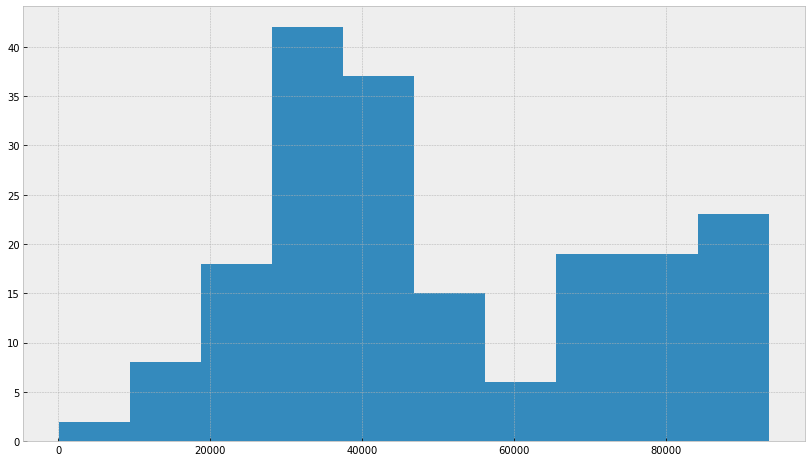

In [24]:
data_test['Preço Minimo'].hist(figsize=(14, 8))

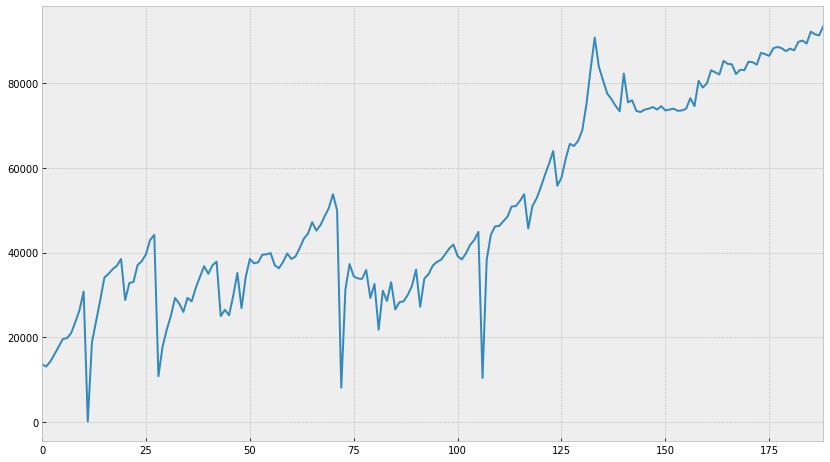

In [25]:
data_test['Preço Minimo'].plot(kind='line', figsize=(14, 8));

In [26]:
data_test['Preço Minimo'].value_counts()

39600    3
29300    3
73800    3
74000    3
38500    3
51000    2
43000    2
73600    2
38300    2
37800    2
53800    2
28500    2
35000    2
74600    2
21800    2
37000    2
44200    2
36900    2
28800    2
88300    2
83100    2
73500    2
17800    2
33900    2
39800    2
30800    1
50900    1
76300    1
33100    1
82300    1
        ..
41100    1
85000    1
90800    1
26500    1
32600    1
92200    1
16000    1
38000    1
34300    1
37500    1
8100     1
84600    1
34200    1
88600    1
31300    1
39100    1
75000    1
10400    1
37300    1
41000    1
35200    1
41900    1
74400    1
68900    1
26600    1
46500    1
80000    1
83200    1
36000    1
38400    1
Name: Preço Minimo, Length: 159, dtype: int64

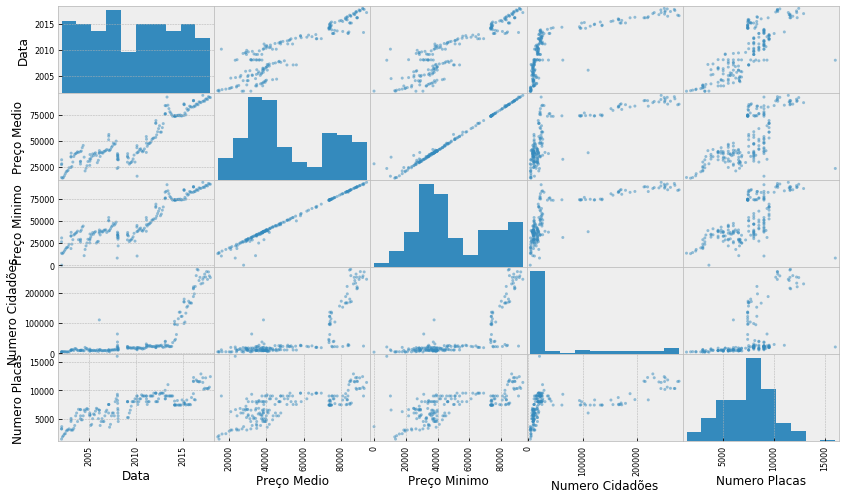

In [27]:
pd.plotting.scatter_matrix(data_test, figsize=(14, 8));

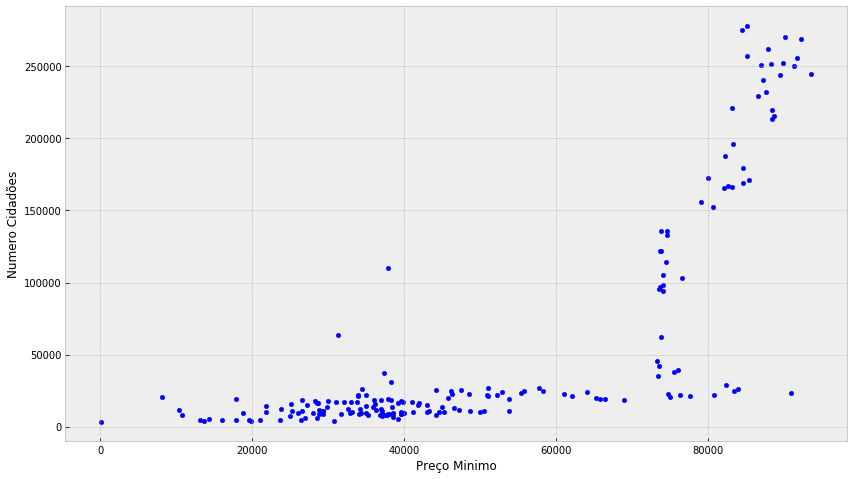

In [28]:
data_test.plot(x='Preço Minimo', y='Numero Cidadões', kind='scatter', figsize=(14, 8));

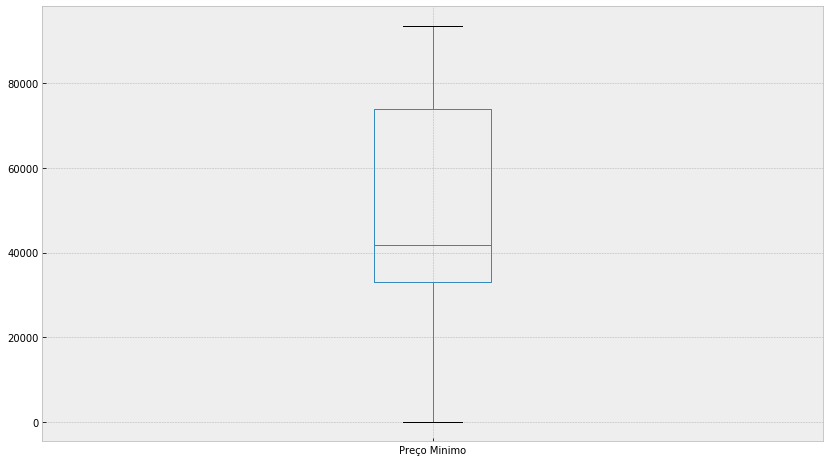

In [29]:
data_test['Preço Minimo'].plot(kind='box', figsize=(14, 8));

In [30]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 5 columns):
Data               189 non-null float64
Preço Medio        189 non-null int64
Preço Minimo       189 non-null int64
Numero Cidadões    189 non-null int64
Numero Placas      189 non-null int64
dtypes: float64(1), int64(4)
memory usage: 7.5 KB


In [31]:
# data_test.drop_duplicates(inplace=True)

In [32]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 5 columns):
Data               189 non-null float64
Preço Medio        189 non-null int64
Preço Minimo       189 non-null int64
Numero Cidadões    189 non-null int64
Numero Placas      189 non-null int64
dtypes: float64(1), int64(4)
memory usage: 7.5 KB


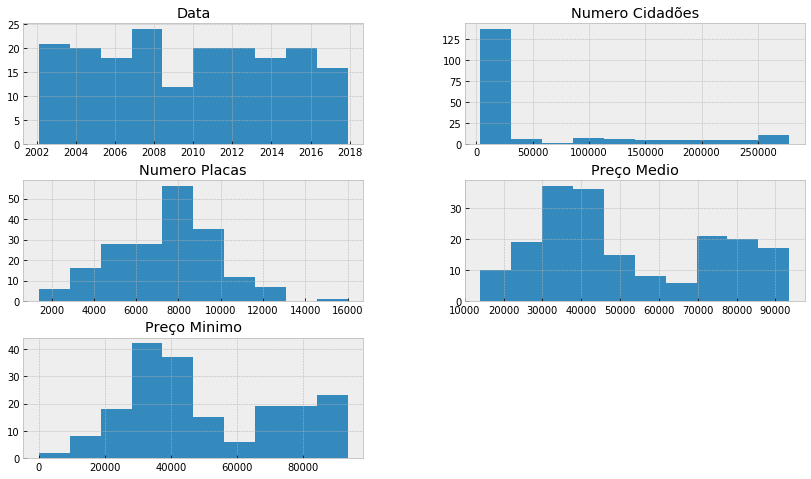

In [33]:
data_test.hist(figsize=(14, 8));

In [34]:
data_test.head()

,Data,Preço Medio,Preço Minimo,Numero Cidadões,Numero Placas
0,2002.1,14735,13600,3718,1400
1,2002.2,14057,13100,4590,1800
2,2002.3,14662,14300,5190,2000
3,2002.4,16334,16000,4806,2300
4,2002.5,18357,17800,4665,2350


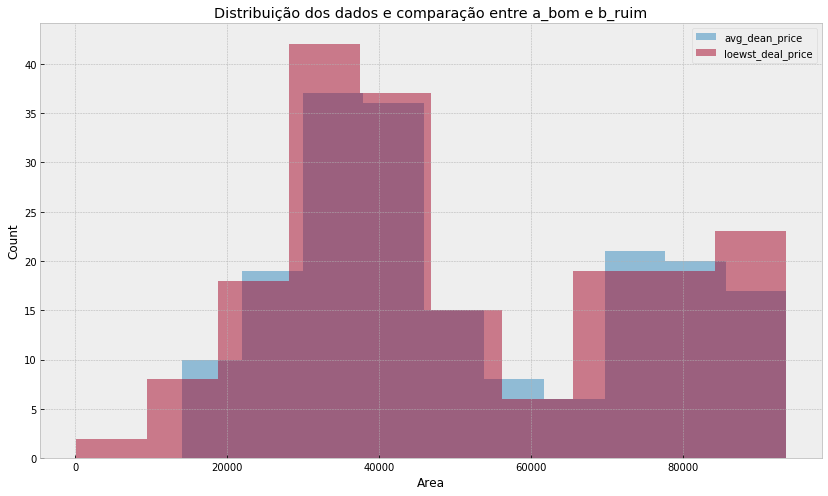

In [35]:
fig, ax = plt.subplots(figsize=(14, 8))
ax.hist(data_test['Preço Medio'], alpha=0.5, label='avg_dean_price')
ax.hist(data_test['Preço Minimo'], alpha=0.5, label='loewst_deal_price')
ax.set_title('Distribuição dos dados e comparação entre a_bom e b_ruim')
ax.set_xlabel('Area')
ax.set_ylabel('Count')
ax.legend(loc='upper right')
plt.show()

### 05 principais valores medios

In [36]:
data_test['Preço Minimo'].value_counts().head(5)

39600    3
29300    3
73800    3
74000    3
38500    3
Name: Preço Minimo, dtype: int64

### 05 principais preços minimos

In [37]:
data_test['Preço Medio'].value_counts().head(5)

28927    1
73872    1
80803    1
47700    1
44627    1
Name: Preço Medio, dtype: int64

### Averiguar qual o tipo de dados

In [38]:
type(data_test['Data'].iloc[1])

numpy.float64

### Converter string para um datetime

In [39]:
# data_test['Data'] = pd.to_datetime(data_test['Data'])

In [40]:
# type(data_test['Data'].iloc[0])

In [41]:
# data_test['Data'].iloc[3]

### Análise Exploratória dos Dados

In [42]:
# definições de estilo do seaborn
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

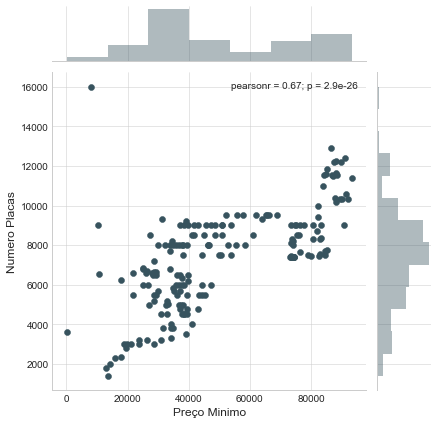

In [43]:
sns.jointplot(x='Preço Minimo', y='Numero Placas', data=data_test)

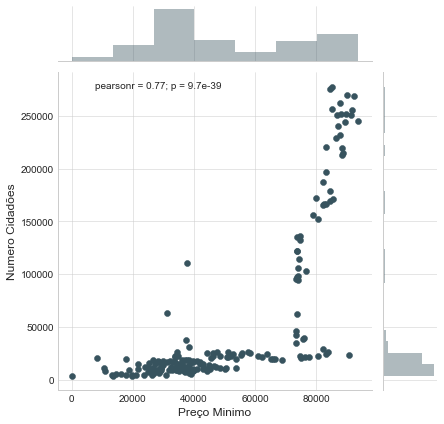

In [44]:
sns.jointplot(x='Preço Minimo', y='Numero Cidadões', data=data_test)

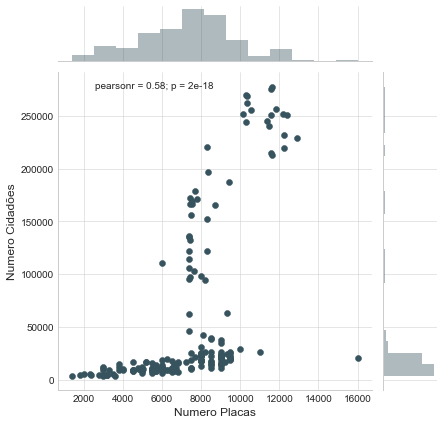

In [45]:
sns.jointplot(x='Numero Placas', y='Numero Cidadões', data=data_test)

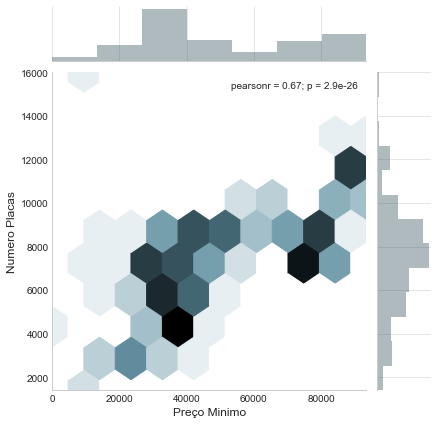

In [46]:
sns.jointplot(x='Preço Minimo', y='Numero Placas', data=data_test, kind='hex')

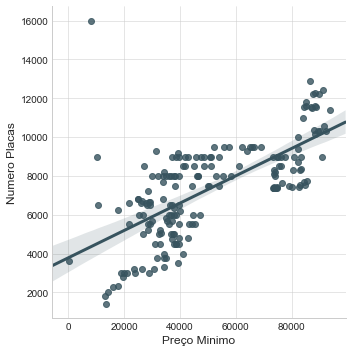

In [47]:
sns.lmplot(x='Preço Minimo', y='Numero Placas', data=data_test)

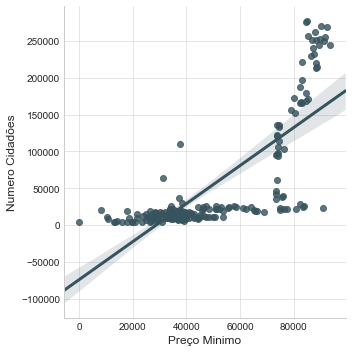

In [48]:
sns.lmplot(x='Preço Minimo', y='Numero Cidadões', data=data_test)

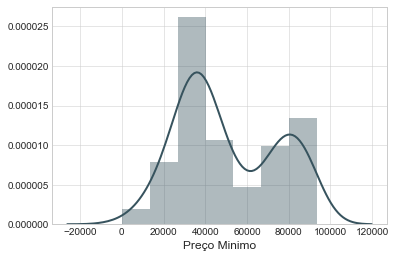

In [49]:
sns.distplot(data_test['Preço Minimo'])

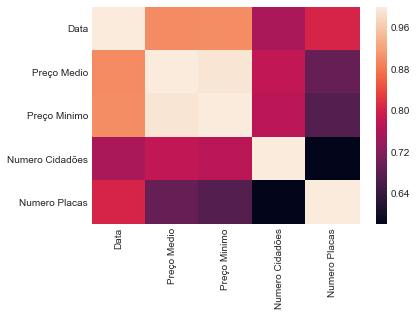

In [50]:
sns.heatmap(data_test.corr())

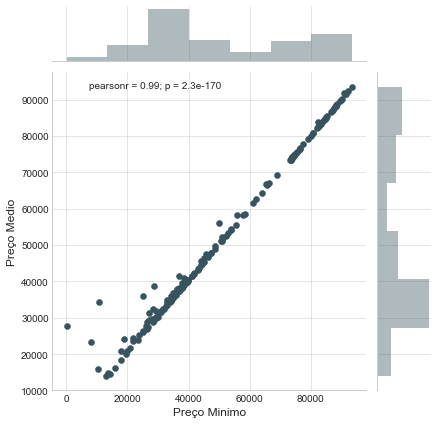

In [51]:
sns.jointplot(x='Preço Minimo', y='Preço Medio', data=data_test)

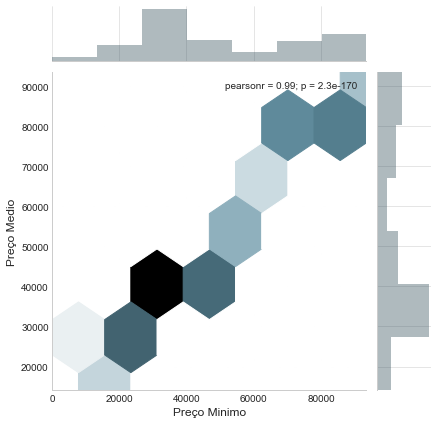

In [52]:
sns.jointplot(x='Preço Minimo', y='Preço Medio', kind='hex', data=data_test) 

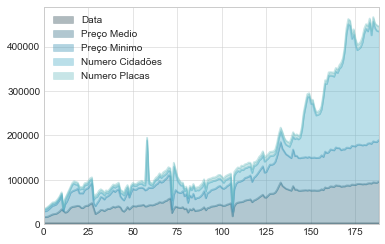

In [53]:
data_test.plot.area(alpha=0.4)

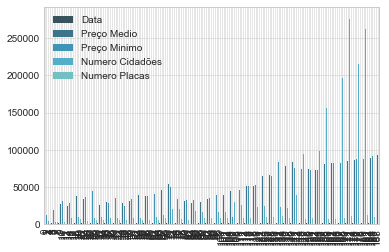

In [54]:
data_test.plot.bar()

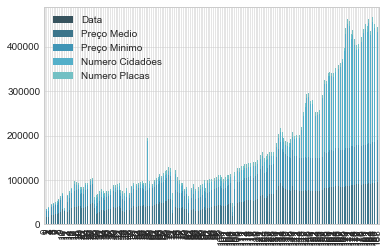

In [55]:
data_test.plot.bar(stacked=True)

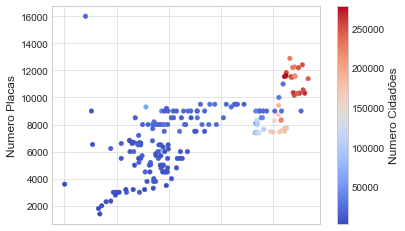

In [56]:
data_test.plot.scatter(x='Preço Minimo',y='Numero Placas',c='Numero Cidadões',cmap='coolwarm')

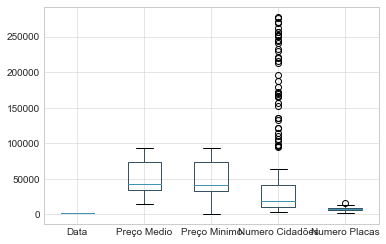

In [57]:
data_test.plot.box()

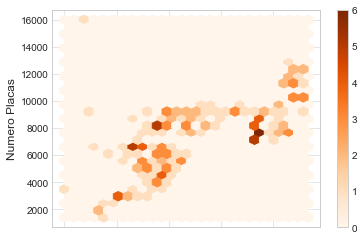

In [58]:
data_test.plot.hexbin(x='Preço Minimo',y='Numero Placas',gridsize=25,cmap='Oranges')

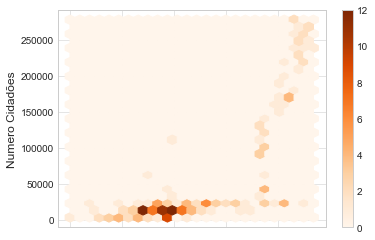

In [59]:
data_test.plot.hexbin(x='Preço Minimo',y='Numero Cidadões',gridsize=25,cmap='Oranges')

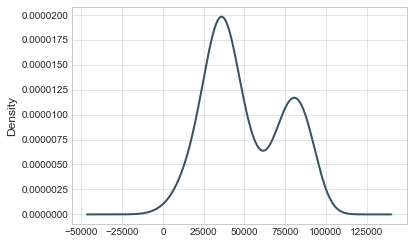

In [60]:
data_test['Preço Minimo'].plot.kde()

C:\Users\Marcus\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


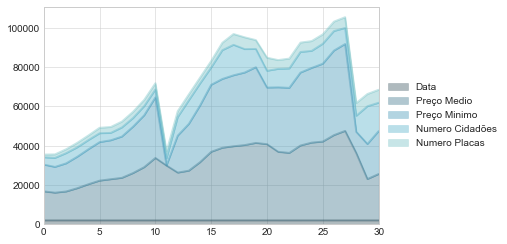

In [61]:
f = plt.figure()
data_test.ix[0:30].plot.area(alpha=0.4,ax=f.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

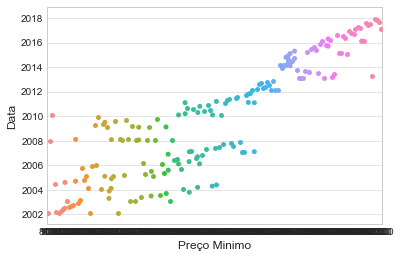

In [62]:
sns.stripplot(x="Preço Minimo", y="Data", data=data_test, jitter=True)

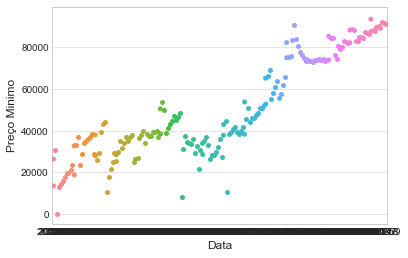

In [63]:
sns.stripplot(x="Data", y="Preço Minimo", data=data_test, jitter=True)

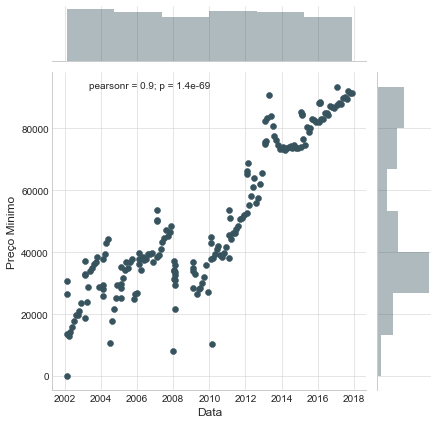

In [64]:
sns.jointplot(x="Data", y="Preço Minimo", data=data_test, kind='scatter')

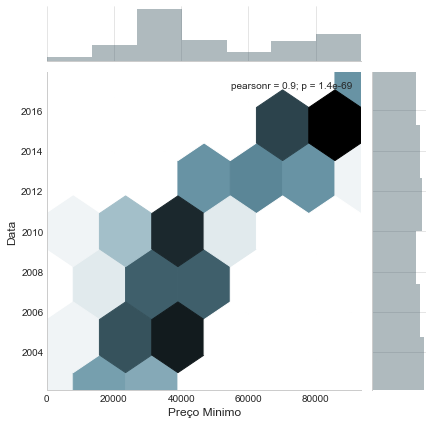

In [65]:
sns.jointplot(x="Preço Minimo", y="Data", data=data_test, kind='hex')

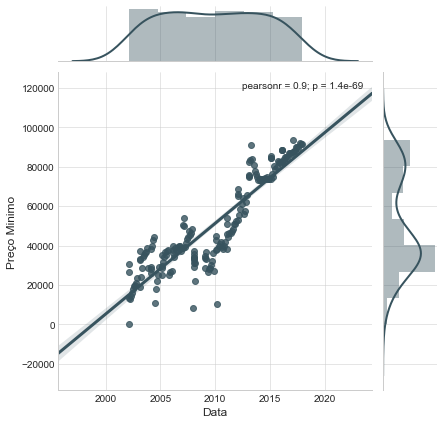

In [66]:
sns.jointplot(x="Data", y="Preço Minimo", data=data_test, kind='reg')

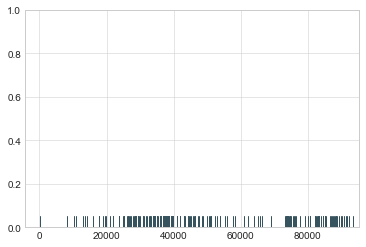

In [67]:
sns.rugplot(data_test['Preço Minimo'])

# Regressão linear

In [68]:
shangaipred = pd.read_csv('license_plates_acution_data.csv')

In [69]:
shangaipred.head()

,Unnamed: 0,Date,avg_deal_price,lowest_deal_price,num_bidder,num_plates
0,0,2002.1,14735,13600,3718,1400
1,1,2002.2,14057,13100,4590,1800
2,2,2002.3,14662,14300,5190,2000
3,3,2002.4,16334,16000,4806,2300
4,4,2002.5,18357,17800,4665,2350


In [70]:
shangaipred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 6 columns):
Unnamed: 0           189 non-null int64
Date                 189 non-null float64
avg_deal_price       189 non-null int64
lowest_deal_price    189 non-null int64
num_bidder           189 non-null int64
num_plates           189 non-null int64
dtypes: float64(1), int64(5)
memory usage: 8.9 KB


In [71]:
shangaipred.describe()

,Unnamed: 0,Date,avg_deal_price,lowest_deal_price,num_bidder,num_plates
count,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000
mean,94.000000,2009.814233,51632.867725,50431.216931,56142.423280,7336.111111
std,54.703748,4.612254,22548.372228,23574.450403,78988.734651,2468.294304
min,0.000000,2002.100000,14057.000000,100.000000,3525.000000,1400.000000
25%,47.000000,2005.900000,34684.000000,33100.000000,10170.000000,5690.000000
50%,94.000000,2009.900000,42262.000000,41900.000000,18575.000000,7500.000000
75%,141.000000,2013.800000,74113.000000,74000.000000,41946.000000,9000.000000
max,188.000000,2017.900000,93540.000000,93500.000000,277889.000000,16000.000000


In [72]:
shangaipred.columns

Index(['Unnamed: 0', 'Date', 'avg_deal_price', 'lowest_deal_price',
       'num_bidder', 'num_plates'],
      dtype='object')

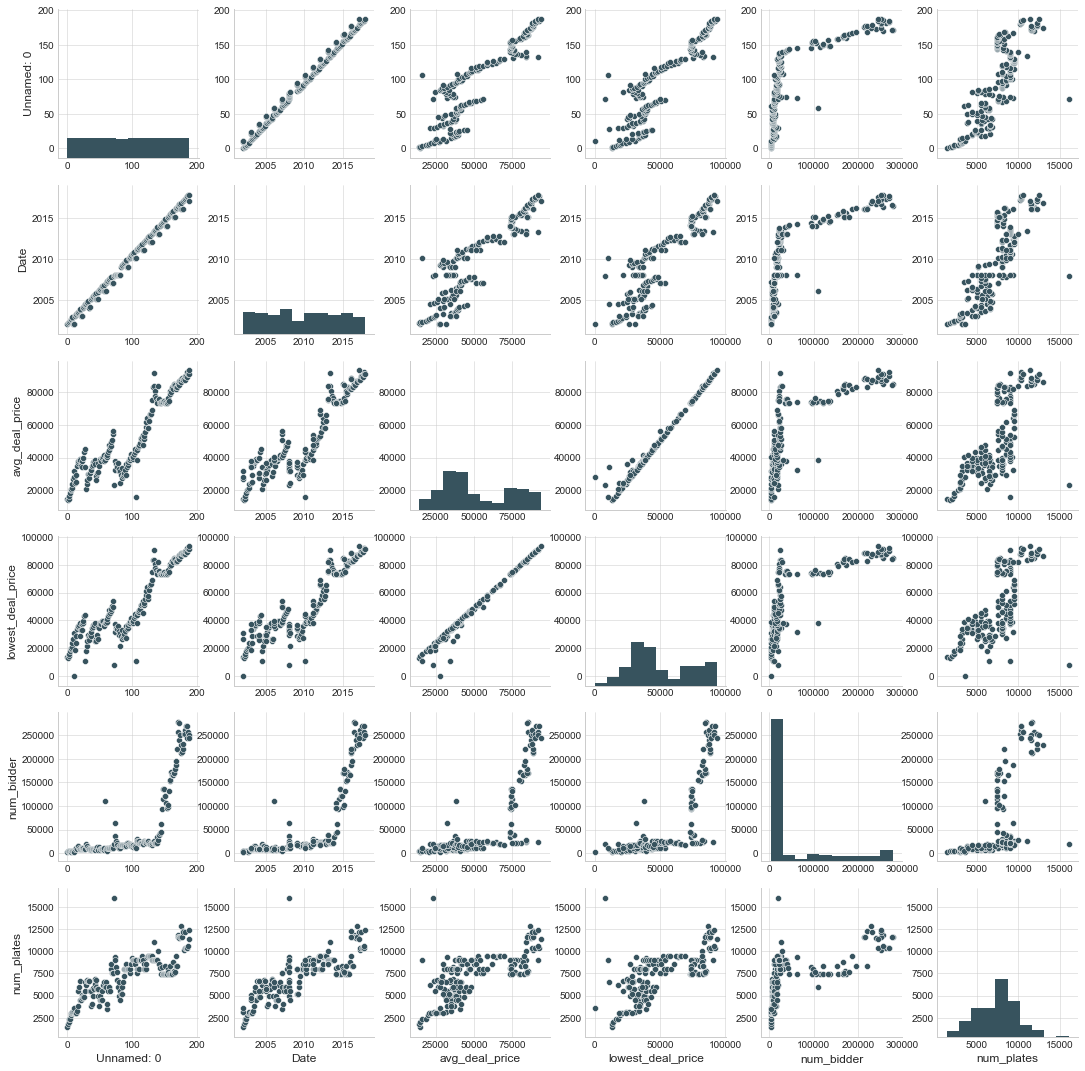

In [73]:
sns.pairplot(shangaipred)

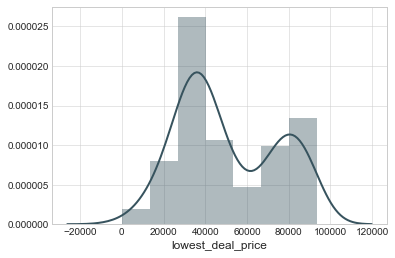

In [74]:
sns.distplot(shangaipred['lowest_deal_price'])

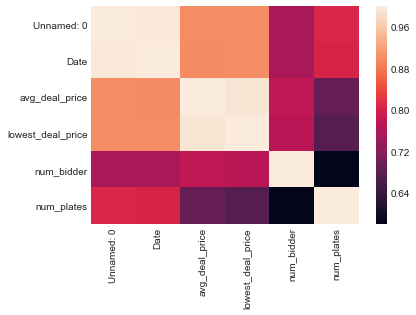

In [75]:
sns.heatmap(shangaipred.corr())

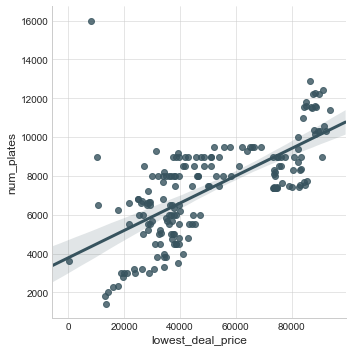

In [76]:
sns.lmplot(x='lowest_deal_price', y='num_plates', data=shangaipred)

In [77]:
shangaipred.columns

Index(['Unnamed: 0', 'Date', 'avg_deal_price', 'lowest_deal_price',
       'num_bidder', 'num_plates'],
      dtype='object')

### Iniciando a aplicação do machine learning

In [78]:
X = shangaipred[['Date', 'avg_deal_price',
       'num_bidder', 'num_plates']]

In [79]:
y = shangaipred['lowest_deal_price']

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [82]:
X_train.shape[0]

132

In [83]:
from sklearn.linear_model import LinearRegression

In [84]:
lm = LinearRegression()

In [85]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Avaliando o Modelo

In [86]:
print(lm.intercept_)

-1269937.2454


In [87]:
print(lm.coef_)

[  6.34248442e+02   9.90833054e-01  -4.57581336e-03  -7.27898745e-01]


In [88]:
coefs = pd.DataFrame(lm.coef_, X.columns, columns=['Coefs'])

In [89]:
coefs

,Coefs
Date,634.248442
avg_deal_price,0.990833
num_bidder,-0.004576
num_plates,-0.727899


In [90]:
predict = lm.predict(X_test)

In [91]:
predict

array([ 29638.75685704,  34252.05502828,  41220.42924486,  22336.10922834,
        92442.87233766,  23687.03458641,  63384.36526461,  35066.64026336,
        80531.49449136,  50034.15693384,  37368.93266299,  30786.7392496 ,
        31178.52831884,  91391.69155458,  75112.49184563,  86344.59396086,
        86132.64412801,  55489.27147879,  74662.35436536,  82261.96510766,
        22343.45365373,  32922.62505695,  45546.64880304,  26543.23843966,
        35320.53185089,  38405.61882546,  57315.01083791,  27812.92709228,
        40657.43288849,  86333.14951783,  46018.29467395,  74606.92157526,
        75667.62916338,  37749.63384912,  34511.24288524,  34765.15948207,
        87237.3513567 ,  87905.18740671,  40144.77810998,  51143.32916774,
        43343.9373184 ,  35556.19652232,  16602.07408241,  32799.3557378 ,
        12551.90491216,  32808.90995212,  35381.19765568,  46161.63778969,
        74654.67627908,  29984.34705301,  84683.14295578,  25807.48690829,
        74726.42760169,  

Text(0,0.5,'Predicted Y')

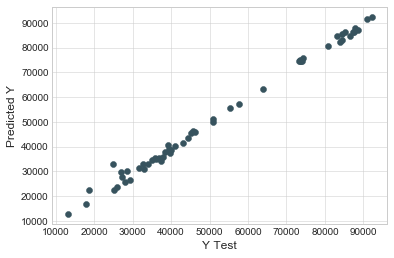

In [92]:
plt.scatter(y_test,predict)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Verificando a acuracia do modelo

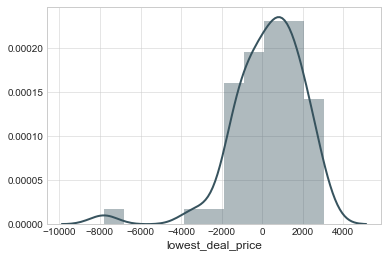

In [93]:
sns.distplot((y_test-predict))

In [94]:
from sklearn import metrics

### Métricas de avaliação de regressão

Aqui estão três métricas de avaliação comuns para problemas de regressão:

Mean absolute error (erro absoluto médio) (MAE) é a média do valor absoluto dos erros:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$
Mean Squared Error (erro médio quadrático) (MSE) é a média dos erros quadrados:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$
Root Mean Square Error (raiz do erro quadrático médio) (RMSE) é a raiz quadrada da média dos erros quadrados:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$
Comparando estas métricas:

MAE é o mais fácil de entender, porque é o erro médio.
MSE é mais popular que o MAE, porque a MSE "puniria" erros maiores, o que tende a ser útil no mundo real.
RMSE é ainda mais popular do que MSE, porque o RMSE é interpretável nas unidades "y".
Todas estas são funções de perda , porque queremos minimizá-las.

In [95]:
print('MAE:', metrics.mean_absolute_error(y_test, predict))
print('MSE:', metrics.mean_squared_error(y_test, predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict)))

MAE: 1350.45985006
MSE: 3231963.93481
RMSE: 1797.76637381


### Verificando a acuracia do modelo com base nos residuos que sobraram

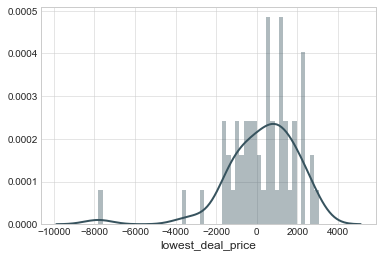

In [96]:
sns.distplot((y_test-predict), bins=50);

In [97]:
coefs = pd.DataFrame(lm.coef_, X.columns, columns=['Coefs'])
coefs

,Coefs
Date,634.248442
avg_deal_price,0.990833
num_bidder,-0.004576
num_plates,-0.727899


# Regressão Logistica

Text(0.5,0,'Preço Minimo')

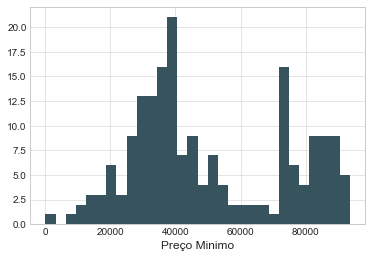

In [98]:
sns.set_style('whitegrid')
data_test['Preço Minimo'].hist(bins=30)
plt.xlabel('Preço Minimo')

Text(0.5,0,'Preço Minimo')

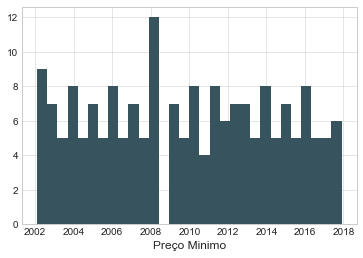

In [99]:
sns.set_style('whitegrid')
data_test['Data'].hist(bins=30)
plt.xlabel('Preço Minimo')

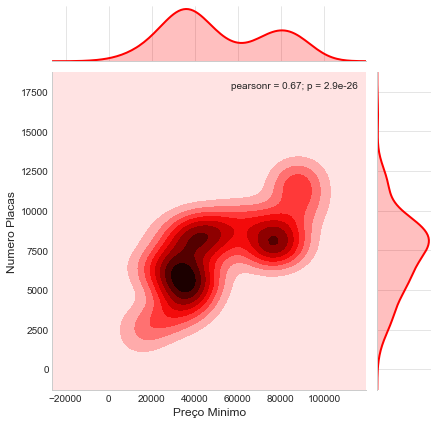

In [100]:
sns.jointplot(x='Preço Minimo', y='Numero Placas', data=data_test, color='red', kind='kde');

In [101]:
X = data_test[['Preço Medio', 'Data', 'Numero Placas', 'Numero Cidadões']]
y = data_test['Preço Minimo']

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [103]:
from sklearn.linear_model import LogisticRegression

In [104]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [105]:
predictions = logmodel.predict(X_test)

In [106]:
predictions

array([91600, 73800, 28800, 41100, 53800, 51000, 28500, 28500, 34200,
       80700, 50000, 51000, 39800, 73800, 39800, 39600, 51000, 73800,
       37800, 51000, 53800, 73800, 75000, 39600, 39600, 89800, 21000,
       73800, 39600, 51000, 73800, 39600, 73800, 28500, 83100, 51000,
       39600, 82300, 29300, 51000, 39800, 51000, 51000, 25000, 37800,
       53800, 73800, 50000, 37800, 28800, 39600, 39800, 51000, 51000,
       51000, 39600, 28800, 73800, 73800, 88200, 37800, 51000, 13100], dtype=int64)

# Support Vector Machines

In [107]:
from sklearn.svm import SVC

In [108]:
X = data_test.drop('Preço Minimo', axis=1)
y = data_test['Preço Minimo']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [109]:
svc_model = SVC()

In [110]:
svc_model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [111]:
predictions = svc_model.predict(X_test)

In [112]:
from sklearn.model_selection import GridSearchCV

In [119]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 

In [120]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................


C:\Users\Marcus\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ............................... C=0.1, gamma=0.001, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ............................... C=0.1, gamma=0.001, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ............................... C=0.1, gamma=0.001, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    1.0s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [121]:
grid_predictions = grid.predict(X_test)

In [122]:
grid.best_estimator_

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [123]:
grid.best_params_

{'C': 0.1, 'gamma': 1}

In [124]:
predictions

array([29300, 29300, 29300, 29300, 29300, 29300, 29300, 29300, 29300,
       29300, 29300, 29300, 29300, 29300, 29300, 29300, 29300, 29300,
       29300, 29300, 29300, 29300, 29300, 29300, 29300, 29300, 29300,
       29300, 29300, 29300, 29300, 29300, 29300, 29300, 29300, 29300,
       29300, 29300, 29300, 29300, 29300, 29300, 29300, 29300, 29300,
       29300, 29300, 29300, 29300, 29300, 29300, 29300, 29300, 29300,
       29300, 29300, 29300], dtype=int64)

# Principal Component Analysis - PCA

In [125]:
from sklearn.preprocessing import StandardScaler

In [126]:
scaler = StandardScaler()
scaler.fit(data_test)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [127]:
scaled_data = scaler.transform(data_test)

In [128]:
from sklearn.decomposition import PCA

In [129]:
pca = PCA(n_components=2)

In [130]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [131]:
x_pca = pca.transform(scaled_data)

In [132]:
scaled_data.shape

(189, 5)

In [133]:
x_pca.shape

(189, 2)

Text(0,0.5,'Second Principal Component')

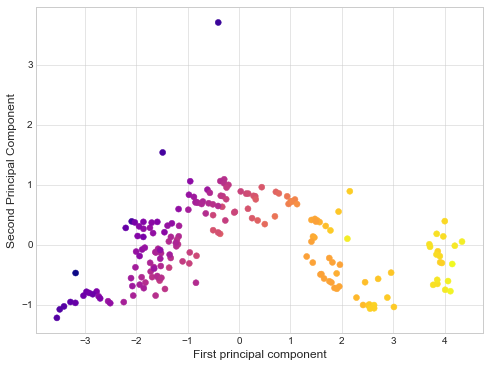

In [134]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=data_test['Preço Minimo'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [135]:
pca.components_

array([[ 0.47063787,  0.47227242,  0.46986331,  0.41791899,  0.40003868],
       [ 0.14383913, -0.20233838, -0.22905404, -0.46119279,  0.82049067]])

# K Nearest Neighbors

In [136]:
from sklearn.preprocessing import StandardScaler

In [137]:
scaler = StandardScaler()

In [138]:
scaler.fit(data_test.drop('Preço Minimo',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [139]:
scaled_features = scaler.transform(data_test.drop('Preço Minimo',axis=1))

In [140]:
data_test_feat = pd.DataFrame(scaled_features,columns=data_test.columns[:-1])
data_test_feat.head()

,Data,Preço Medio,Preço Minimo,Numero Cidadões
0,-1.676994,-1.640734,-0.665458,-2.411332
1,-1.655255,-1.670882,-0.654389,-2.248847
2,-1.633516,-1.643980,-0.646773,-2.167604
3,-1.611777,-1.569631,-0.651647,-2.045740
4,-1.590038,-1.479674,-0.653437,-2.025429


In [141]:
from sklearn.model_selection import train_test_split

In [142]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, data_test['Preço Minimo'], test_size=0.30)

In [143]:
from sklearn.neighbors import KNeighborsClassifier

In [144]:
knn = KNeighborsClassifier(n_neighbors=1)

In [145]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [146]:
pred = knn.predict(X_test)

In [147]:
error_rate = []

# Will take some time
for i in range(1,133):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [148]:
# NOW WITH K=30
knn = KNeighborsClassifier(n_neighbors=30)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [149]:
pred

array([74000, 74000, 38300, 38500, 38300, 74000, 38500, 38300, 38500,
       38300, 38300, 29300, 38300, 38500, 29300, 38300, 74000, 38500,
       29300, 29300, 38300, 29300, 74000, 17800, 17800, 28800, 17800,
       74000, 74000, 29300, 28800, 38500, 29300, 74000, 38300, 38300,
       17800, 38500, 74000, 17800, 29300, 29300, 38300, 74000, 29300,
       74000, 38500, 74000, 74000, 38500, 53800, 74000, 74000, 38300,
       38300, 74000, 17800], dtype=int64)

# Arvores de decisão e florestas aleatórias

Após a analise do pairplot sobre a variavel Preço Medio percebi que não seria tão interessante utilizar a arvore de decisão, pois não temos uma variavel com um resultado palpavel. Por exemplo para esse dataset não temos variaveis dizendo se uma placa de carro foi leiloada ou não, o desafio maior aqui consiste em prever o preço media da liberação de placas com base no número de placas e numeros de usuários. Mesmo assim como base de aprendizado farei a implementação de uma árvore de decisão.

In [150]:
X = data_test.drop('Preço Minimo', axis=1)
y = data_test['Preço Minimo']

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [152]:
from sklearn.tree import DecisionTreeClassifier

In [153]:
dtree = DecisionTreeClassifier()

In [154]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [155]:
predictions = dtree.predict(X_test)

In [156]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(data_test.columns[1:])
features

['Preço Medio', 'Preço Minimo', 'Numero Cidadões', 'Numero Placas']

In [157]:
import os
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())

In [158]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [159]:
rfc_pred = rfc.predict(X_test)

In [160]:
rfc_pred

array([86500, 17800, 33800, 65700, 26500, 37800, 33000, 45700, 38500,
       74600, 38500, 90100, 26500, 83300, 88600, 18800, 37800, 28000,
       32800, 32800, 92200, 46200, 39800, 84600, 28500, 46200, 35200,
       37900, 33000, 32800, 30800, 85000, 55800, 75500, 77600, 65200,
       53800, 32800, 73500, 39600, 32100, 18800, 34900, 92200, 55400,
       73800, 51000, 88200, 28000, 90100, 34300, 27200, 34400, 82100,
       39500, 32800, 41900], dtype=int64)

In [161]:
predictions

array([86500,  8100, 37000, 64000, 26500, 34900, 26900, 65200, 37900,
       74600, 39900, 90100, 26600, 83900, 88600, 18800, 37800, 26500,
       34300, 10800, 92200, 44500, 39800, 85300, 26600, 37800, 36800,
       37900, 33000, 10800,   100, 85000, 55800, 75500, 77600, 65200,
       47200, 10800, 73500, 39600, 34900, 30800, 33800, 86500, 51000,
       73800, 51000, 92200, 29300, 86500, 34300, 17800, 34400, 82100,
       37900, 34300, 43000], dtype=int64)

## Testes com bibliotecas de Time Series Forecasting

In [162]:
data = pd.read_csv("license_plates_acution_data.csv",usecols=["Date",
                                                                          "num_bidder",
                                                                          "num_plates",
                                                                          "lowest_deal_price",
                                                                          "avg_deal_price"],dtype={
    "Date":"str",
    "num_bidder":"float",
    "num_plates":"float",
    "lowest_deal_price":"float",
    "avg_deal_price":"float"
})
data.head()

,Date,avg_deal_price,lowest_deal_price,num_bidder,num_plates
0,2002.1,14735.0,13600.0,3718.0,1400.0
1,2002.2,14057.0,13100.0,4590.0,1800.0
2,2002.3,14662.0,14300.0,5190.0,2000.0
3,2002.4,16334.0,16000.0,4806.0,2300.0
4,2002.5,18357.0,17800.0,4665.0,2350.0


In [163]:
# converter coluna date para uma coluna datetime
data["Date"] = pd.to_datetime(data["Date"])
data.set_index("Date",inplace=True)
data.head()

,avg_deal_price,lowest_deal_price,num_bidder,num_plates
Date,,,,
2002-01-01,14735.0,13600.0,3718.0,1400.0
2002-02-01,14057.0,13100.0,4590.0,1800.0
2002-03-01,14662.0,14300.0,5190.0,2000.0
2002-04-01,16334.0,16000.0,4806.0,2300.0
2002-05-01,18357.0,17800.0,4665.0,2350.0


In [164]:
# checando valores faltantes no dataset
for y in range(2002,2018):
    print(y,": ", data[str(y)].shape)

2002 :  (12, 4)
2003 :  (12, 4)
2004 :  (12, 4)
2005 :  (12, 4)
2006 :  (12, 4)
2007 :  (12, 4)
2008 :  (11, 4)
2009 :  (12, 4)
2010 :  (12, 4)
2011 :  (12, 4)
2012 :  (12, 4)
2013 :  (12, 4)
2014 :  (12, 4)
2015 :  (12, 4)
2016 :  (12, 4)
2017 :  (10, 4)


In [165]:
# dig into 2008, Feb is missing,  fill in missing row with mean of each column 
feb_2008 = pd.DataFrame([data["2008"].mean(axis=0)],index=[pd.to_datetime("2008-02-01")],columns=data.columns)
data = pd.concat([data,feb_2008])
data.sort_index(inplace=True)

In [166]:
data["2008"]

,avg_deal_price,lowest_deal_price,num_bidder,num_plates
2008-01-01,23370.000000,8100.000000,20539.000000,16000.000000
2008-02-01,32379.181818,29945.454545,22616.636364,7681.818182
2008-03-01,32169.000000,31300.000000,63534.000000,9300.000000
2008-04-01,37659.000000,37300.000000,37072.000000,9000.000000
2008-05-01,36047.000000,34400.000000,26341.000000,8200.000000
2008-06-01,34947.000000,33900.000000,21208.000000,7700.000000
2008-07-01,34491.000000,33800.000000,16783.000000,6800.000000
2008-08-01,36460.000000,35900.000000,13451.000000,6000.000000
2008-09-01,31788.000000,29300.000000,11002.000000,6500.000000
2008-10-01,33224.000000,32600.000000,11882.000000,5000.000000


In [167]:
### clearly there is a trend going upwards, but there are also some outliers around 2003,2008,2001
### the outliers were probably caused by governmental interference or policy change, which is unusual
### let's deal with these ourliers by replacing those values with means of the respective year
data.set_value("2002-12-01","lowest_deal_price",data["2002"]["lowest_deal_price"].mean(axis=0))
data.set_value("2008-01-01","lowest_deal_price",data["2007-02":"2008-02"]["lowest_deal_price"].mean(axis=0))
data.set_value("2010-12-01","lowest_deal_price",data["2010"]["lowest_deal_price"].mean(axis=0))

,avg_deal_price,lowest_deal_price,num_bidder,num_plates
2002-01-01,14735.0,13600.000000,3718.0,1400.0
2002-02-01,14057.0,13100.000000,4590.0,1800.0
2002-03-01,14662.0,14300.000000,5190.0,2000.0
2002-04-01,16334.0,16000.000000,4806.0,2300.0
2002-05-01,18357.0,17800.000000,4665.0,2350.0
2002-06-01,20178.0,19600.000000,4502.0,2800.0
2002-07-01,20904.0,19800.000000,3774.0,3000.0
2002-08-01,21601.0,21000.000000,4640.0,3000.0
2002-09-01,24040.0,23600.000000,4393.0,3200.0
2002-10-01,27040.0,26400.000000,4661.0,3200.0


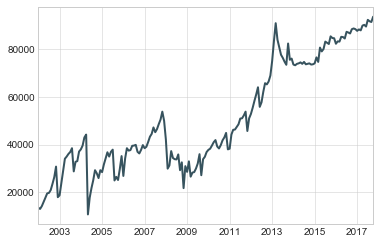

In [168]:
### now it looks smoothier
data["lowest_deal_price"].plot()

In [169]:
## Etapas gerais da análise de séries temporais:
# 1. visuliaze a série temporal
# 2. estacione as séries temporais
# 3. plot acf e pacf para encontrar parâmetros ótimos para o modelo
# 4. build modelo ARIMA
# 5. faça previsões

#### now let's build a function to test stationarity
def test_stationary(ts_data):
    ## visually check
    rol_mean = pd.rolling_mean(ts_data,window=12)
    rol_std = pd.rolling_std(ts_data,window=12)
    plt.figure(figsize=(6,6))
    plt.plot(ts_data,label='original')
    plt.plot(rol_mean,label="rolling mean")
    plt.plot(rol_std,label="rolling std")
    plt.legend()
    ## adfuller test
    result = adfuller(ts_data,autolag="AIC")
    print("---"*5,"ADF TEST RESULT","---"*5,"\n")
    print(" ADF value: ",result[0])
    print(" P_Value: ",result[1])
    print(" Lags used: ", result[2])
    print(" num of obs: ", result[3])
    print("intervals: ", result[4])

--------------- ADF TEST RESULT --------------- 

 ADF value:  -0.979029182671
 P_Value:  0.760835881278
 Lags used:  1
 num of obs:  188
intervals:  {'1%': -3.4656203971241921, '5%': -2.8770397560752436, '10%': -2.5750324547306476}


C:\Users\Marcus\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Marcus\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  if sys.path[0] == '':


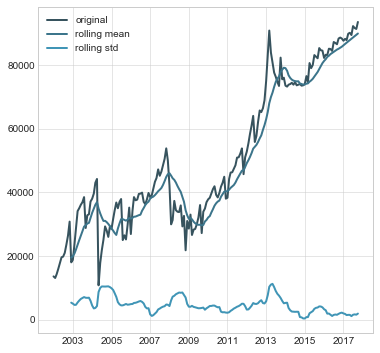

In [170]:
# verificação de estatística dos dados originais
# do resultado (p_value), podemos ver que as séries temporais originais não são estacionárias

test_stationary(data["lowest_deal_price"])

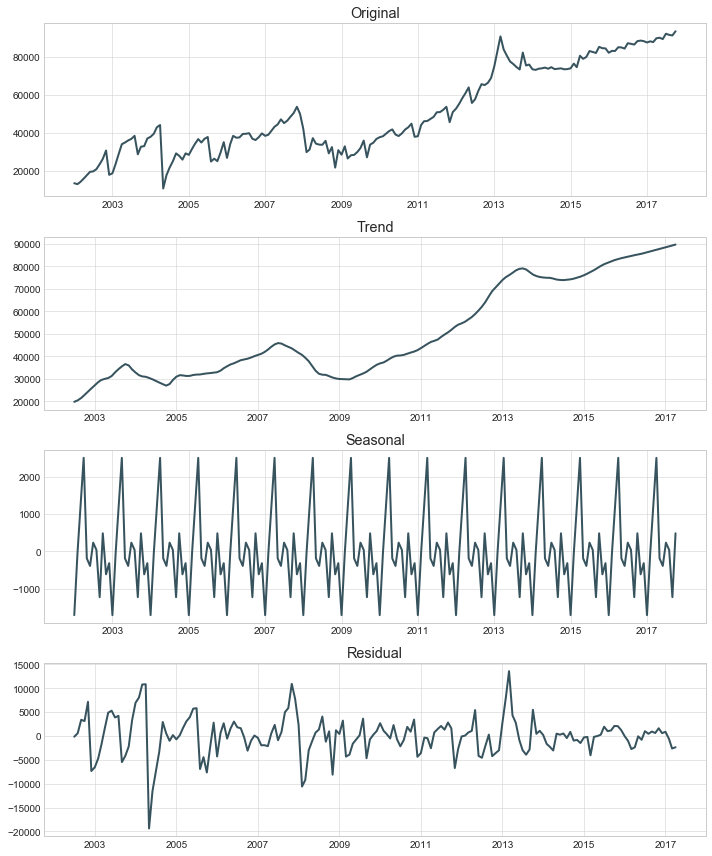

In [171]:
# decompor a tendência, os componentes sazonais dos dados

decomposition = seasonal_decompose(data["lowest_deal_price"])
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.figure(figsize=(10,12))
plt.subplot(411)
plt.plot(data["lowest_deal_price"])
plt.title("Original")
plt.subplot(412)
plt.plot(trend)
plt.title("Trend")
plt.subplot(413)
plt.plot(seasonal)
plt.title("Seasonal")
plt.subplot(414)
plt.plot(residual)
plt.title("Residual")
plt.tight_layout()

--------------- ADF TEST RESULT --------------- 

 ADF value:  -9.17670320351
 P_Value:  2.30976016153e-15
 Lags used:  3
 num of obs:  174
intervals:  {'1%': -3.4685016947910636, '5%': -2.8782983668563396, '10%': -2.5757041590698901}


C:\Users\Marcus\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Marcus\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  if sys.path[0] == '':


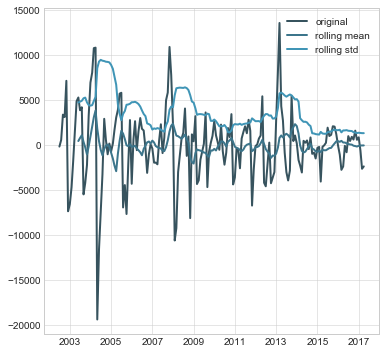

In [172]:
### agora vamos verificar a capacidade estacionaria dos residuos
test_stationary(residual.dropna())

--------------- ADF TEST RESULT --------------- 

 ADF value:  -1.4364628517
 P_Value:  0.564675988593
 Lags used:  7
 num of obs:  182
intervals:  {'1%': -3.4668001583460613, '5%': -2.8775552336674317, '10%': -2.5753075498128246}


C:\Users\Marcus\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Marcus\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  if sys.path[0] == '':


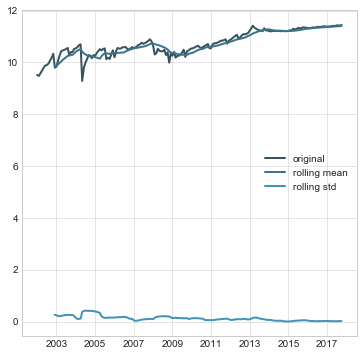

In [173]:
# Agora vou tentar estacionar manualmente, isso geralmente pode ser feito por transformação de log ou diferença

data_log = np.log(data["lowest_deal_price"])
test_stationary(data_log)

--------------- ADF TEST RESULT --------------- 

 ADF value:  -9.96284104619
 P_Value:  2.34869316457e-17
 Lags used:  2
 num of obs:  186
intervals:  {'1%': -3.466005071659723, '5%': -2.8772078537639385, '10%': -2.5751221620996647}


C:\Users\Marcus\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Marcus\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  if sys.path[0] == '':


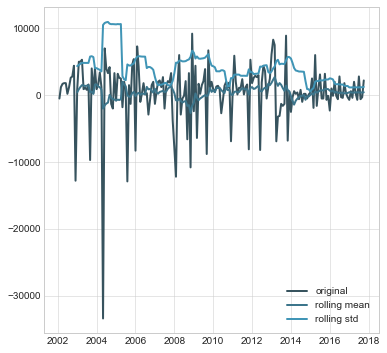

In [174]:
# pandas tem esta função incorporada diff () para fazer a diferença

data_diff_1 = data["lowest_deal_price"].diff().dropna()
test_stationary(data_diff_1)

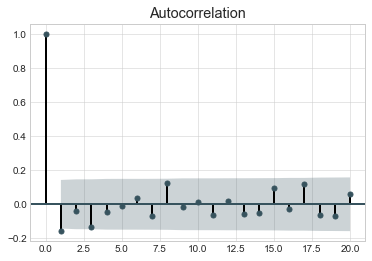

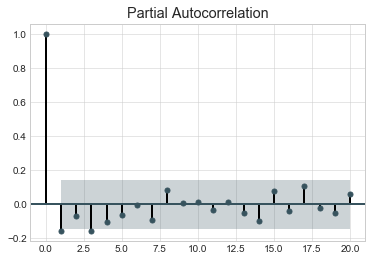

In [175]:
# a série temporal está estacionária agora.
# vou traçar o acf e o pacf para a seleção do modelo

acf_plot = plot_acf(data_diff_1,lags=20)
pacf_plot = plot_pacf(data_diff_1,lags=20)

                              ARIMA Model Results                              
Dep. Variable:     D.lowest_deal_price   No. Observations:                  189
Model:                  ARIMA(1, 1, 1)   Log Likelihood               -1848.708
Method:                        css-mle   S.D. of innovations           4282.163
Date:                 Thu, 22 Feb 2018   AIC                           3705.416
Time:                         03:47:19   BIC                           3718.383
Sample:                     02-01-2002   HQIC                          3710.669
                          - 10-01-2017                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       414.1111    166.792      2.483      0.014      87.205     741.017
ar.L1.D.lowest_deal_price     0.5685      0.163      3.486      0.001       0.

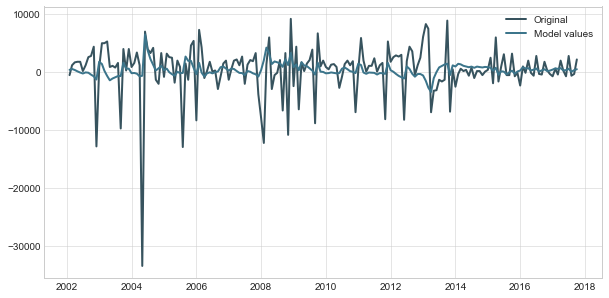

In [176]:
# do acf e pacf, parece que precisamos de um modelo ARIMA de p = 1, d = 1, q = 1
model = ARIMA(data["lowest_deal_price"],order=(1,1,1))
model_fit = model.fit(disp=1)
summary = model_fit.summary()
fitted_values = model_fit.fittedvalues
print(summary)
plt.figure(figsize=(10,5))
plt.plot(data_diff_1,label="Original")
plt.plot(fitted_values, label="Model values")
plt.legend()

### O modelo está indo bem, esté é um ponto interessante para realizar melhoriar no modelo

In [177]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Média do rolamento e desvio padrão')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Resultados do teste Dickey-Fuller:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

C:\Users\Marcus\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
C:\Users\Marcus\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


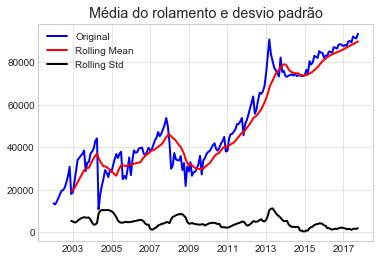

Resultados do teste Dickey-Fuller:
Test Statistic                  -0.979029
p-value                          0.760836
#Lags Used                       1.000000
Number of Observations Used    188.000000
Critical Value (1%)             -3.465620
Critical Value (5%)             -2.877040
Critical Value (10%)            -2.575032
dtype: float64


In [178]:
test_stationarity(data["lowest_deal_price"])

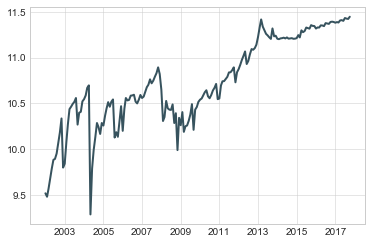

In [179]:
data_log = np.log(data["lowest_deal_price"])
plt.plot(data_log)

C:\Users\Marcus\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """Entry point for launching an IPython kernel.


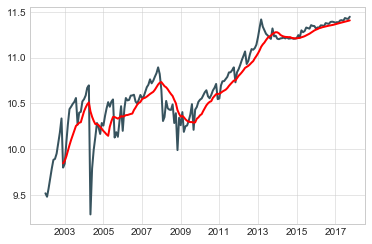

In [180]:
moving_avg = pd.rolling_mean(data_log,12)
plt.plot(data_log)
plt.plot(moving_avg, color='red')

In [181]:
data_log_moving_avg_diff = data_log - moving_avg
data_log_moving_avg_diff.head(12)

2002-01-01         NaN
2002-02-01         NaN
2002-03-01         NaN
2002-04-01         NaN
2002-05-01         NaN
2002-06-01         NaN
2002-07-01         NaN
2002-08-01         NaN
2002-09-01         NaN
2002-10-01         NaN
2002-11-01         NaN
2002-12-01   -0.046951
Name: lowest_deal_price, dtype: float64

C:\Users\Marcus\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
C:\Users\Marcus\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


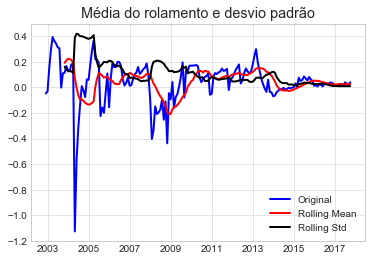

Resultados do teste Dickey-Fuller:
Test Statistic                -6.492366e+00
p-value                        1.217701e-08
#Lags Used                     0.000000e+00
Number of Observations Used    1.780000e+02
Critical Value (1%)           -3.467632e+00
Critical Value (5%)           -2.877918e+00
Critical Value (10%)          -2.575501e+00
dtype: float64


In [182]:
data_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(data_log_moving_avg_diff)

C:\Users\Marcus\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=12,min_periods=0,adjust=True,ignore_na=False).mean()
  """Entry point for launching an IPython kernel.


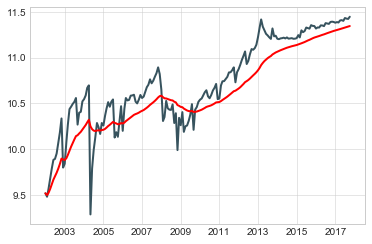

In [183]:
expwighted_avg = pd.ewma(data_log, halflife=12)
plt.plot(data_log)
plt.plot(expwighted_avg, color='red')

C:\Users\Marcus\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
C:\Users\Marcus\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


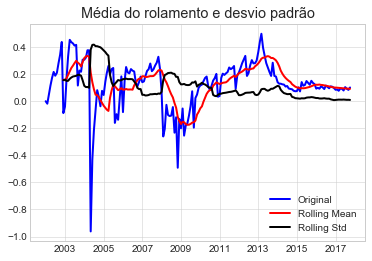

Resultados do teste Dickey-Fuller:
Test Statistic                  -5.101283
p-value                          0.000014
#Lags Used                       1.000000
Number of Observations Used    188.000000
Critical Value (1%)             -3.465620
Critical Value (5%)             -2.877040
Critical Value (10%)            -2.575032
dtype: float64


In [184]:
data_log_ewma_diff = data_log - expwighted_avg 
test_stationarity(data_log_ewma_diff)

## Diferenciação

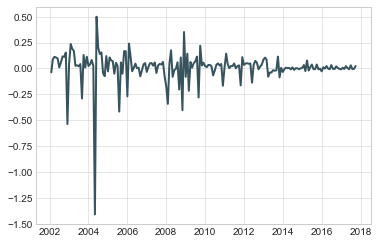

In [185]:
data_log_diff = data_log - data_log.shift()
plt.plot(data_log_diff)

C:\Users\Marcus\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
C:\Users\Marcus\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


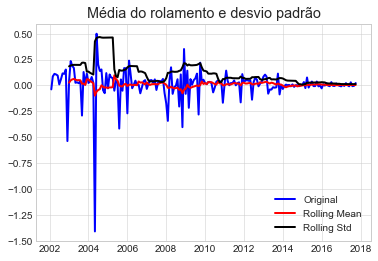

Resultados do teste Dickey-Fuller:
Test Statistic                -7.330758e+00
p-value                        1.129512e-10
#Lags Used                     6.000000e+00
Number of Observations Used    1.820000e+02
Critical Value (1%)           -3.466800e+00
Critical Value (5%)           -2.877555e+00
Critical Value (10%)          -2.575308e+00
dtype: float64


In [186]:
data_log_diff.dropna(inplace=True)
test_stationarity(data_log_diff)

## Decomposição

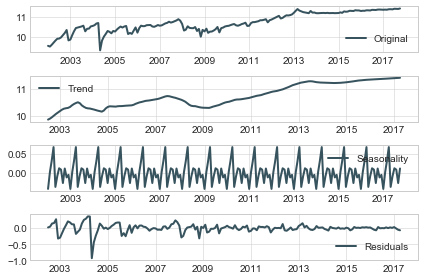

In [187]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data_log) 
trend = decomposition.trend 
seasonal = decomposition.seasonal 
residual = decomposition.resid 
plt.subplot(411) 
plt.plot(data_log, label='Original') 
plt.legend(loc='best') 
plt.subplot(412) 
plt.plot(trend, label='Trend') 
plt.legend(loc='best') 
plt.subplot(413) 
plt.plot(seasonal,label='Seasonality') 
plt.legend(loc='best') 
plt.subplot(414) 
plt.plot(residual, label='Residuals') 
plt.legend(loc='best') 
plt.tight_layout()

C:\Users\Marcus\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
C:\Users\Marcus\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


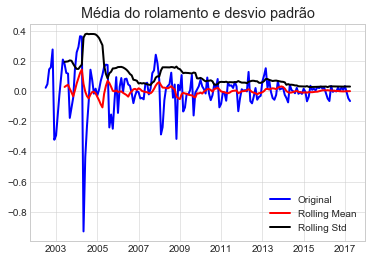

Resultados do teste Dickey-Fuller:
Test Statistic                -6.676519e+00
p-value                        4.450996e-09
#Lags Used                     1.300000e+01
Number of Observations Used    1.640000e+02
Critical Value (1%)           -3.470866e+00
Critical Value (5%)           -2.879330e+00
Critical Value (10%)          -2.576255e+00
dtype: float64


In [188]:
data_log_decompose = residual 
data_log_decompose.dropna(inplace=True) 
test_stationarity(data_log_decompose)

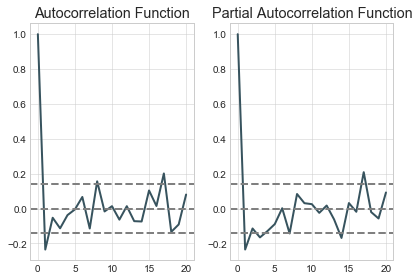

In [189]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(data_log_diff, nlags=20)
lag_pacf = pacf(data_log_diff, nlags=20, method='ols')

#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF: 
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_log_diff)),linestyle='--',color='gray') 
plt.title('Partial Autocorrelation Function') 
plt.tight_layout()

## Modelo AR

In [190]:
from statsmodels.tsa.arima_model import ARIMA

Text(0.5,1,'RSS: 4.0880')

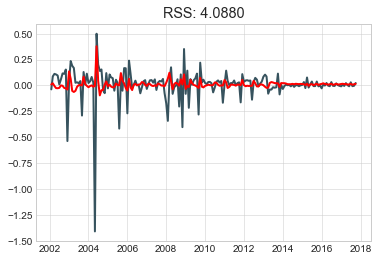

In [191]:
model = ARIMA(data_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(data_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-data_log_diff)**2))

## Modelo MA

Text(0.5,1,'RSS: 3.9558')

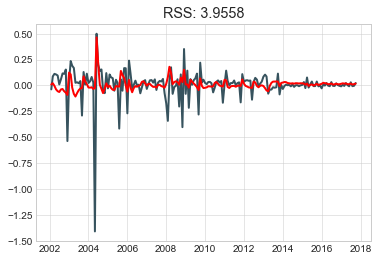

In [192]:
model = ARIMA(data_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(data_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-data_log_diff)**2))

## Modelo Combinado

Text(0.5,1,'RSS: 3.8781')

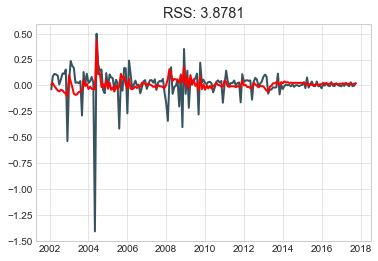

In [193]:
model = ARIMA(data_log, order=(2, 1, 2)) 
results_ARIMA = model.fit(disp=-1) 
plt.plot(data_log_diff) 
plt.plot(results_ARIMA.fittedvalues, color='red') 
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-data_log_diff)**2))

In [194]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True) 
print(predictions_ARIMA_diff.head())

2002-02-01    0.009595
2002-03-01    0.021326
2002-04-01   -0.006610
2002-05-01   -0.026274
2002-06-01   -0.047673
dtype: float64


In [195]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum() 
print(predictions_ARIMA_diff_cumsum.head())

2002-02-01    0.009595
2002-03-01    0.030921
2002-04-01    0.024312
2002-05-01   -0.001963
2002-06-01   -0.049636
dtype: float64


In [196]:
predictions_ARIMA_log = pd.Series(data_log.ix[0], index=data_log.index)
predictions_ARIMA_log=predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0) 
predictions_ARIMA_log.head()

C:\Users\Marcus\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


2002-01-01    9.517825
2002-02-01    9.527420
2002-03-01    9.548746
2002-04-01    9.542137
2002-05-01    9.515862
dtype: float64

Text(0.5,1,'RMSE: 26238.9538')

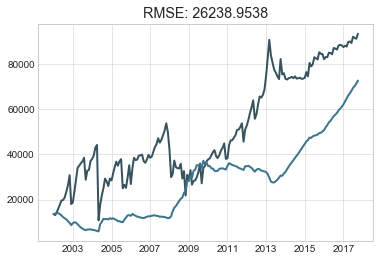

In [197]:
predictions_ARIMA = np.exp(predictions_ARIMA_log) 
plt.plot(data["lowest_deal_price"]) 
plt.plot(predictions_ARIMA) 
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-data["lowest_deal_price"])**2)/len(data["lowest_deal_price"])))

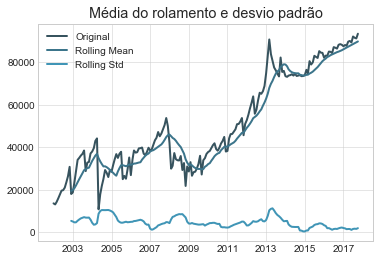

In [198]:
# Determinando estatísticas de rolagem

rolmean = data["lowest_deal_price"].rolling(window=12).mean()
rolstd = data["lowest_deal_price"].rolling(window=12).std()

#Plot rolling statistics:
orig = plt.plot(data["lowest_deal_price"], label='Original')
mean = plt.plot(rolmean, label='Rolling Mean')
std = plt.plot(rolstd, label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Média do rolamento e desvio padrão')
plt.show(block=False)

In [199]:
# Performance do Dickey-Fuller Test:
from statsmodels.tsa.stattools import adfuller
print('Resultados do teste Dickey-Fuller:')
dftest = adfuller(data["lowest_deal_price"], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Resultados do teste Dickey-Fuller:
Test Statistic                  -0.979029
p-value                          0.760836
#lags Used                       1.000000
Number of Observations Used    188.000000
Critical Value (1%)             -3.465620
Critical Value (5%)             -2.877040
Critical Value (10%)            -2.575032
dtype: float64


In [200]:
preco = data["lowest_deal_price"]

In [201]:
decomposition = sm.tsa.seasonal_decompose(preco, model='multiplicative')

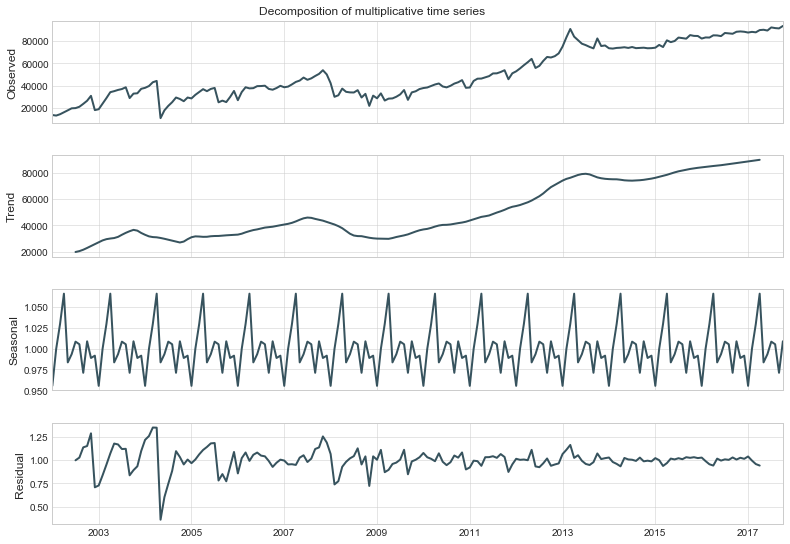

In [202]:
fig = decomposition.plot()
fig.set_figwidth(12)
fig.set_figheight(8)
fig.suptitle('Decomposition of multiplicative time series')
plt.show()

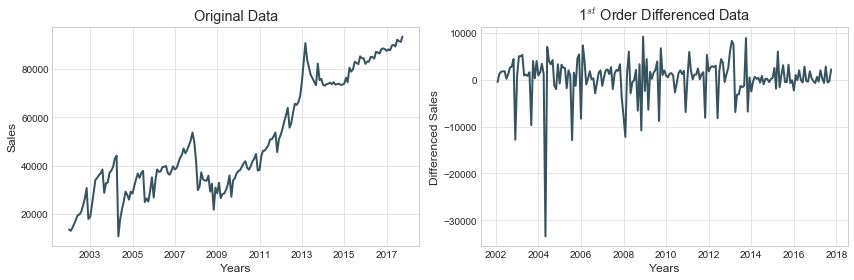

In [203]:
fig, axes = plt.subplots(1, 2, sharey=False, sharex=False)
fig.set_figwidth(12)
fig.set_figheight(4)
axes[0].plot(data.index, data["lowest_deal_price"])
axes[0].set_xlabel("Years")
axes[0].set_ylabel("Sales")
axes[0].set_title("Original Data")
axes[1].plot(data.index, data["lowest_deal_price"].diff(periods=1))
axes[1].set_xlabel("Years")
axes[1].set_ylabel("Differenced Sales")
axes[1].set_title("1$^{st}$ Order Differenced Data")
plt.tight_layout()
plt.show()

Text(0,0.5,'Tractor Sales')

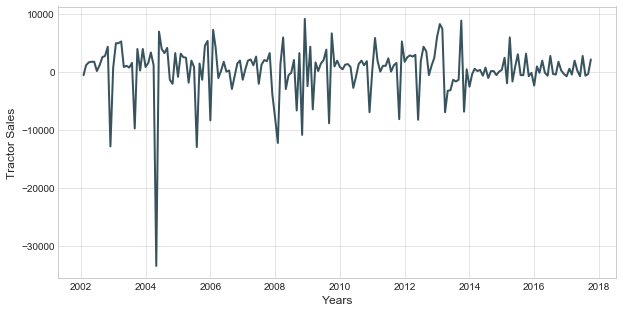

In [204]:
plt.figure(figsize=(10, 5))
plt.plot(preco.diff(periods=1))
plt.xlabel('Years')
plt.ylabel('Tractor Sales')

Text(0,0.5,'Log (Tractor Sales)')

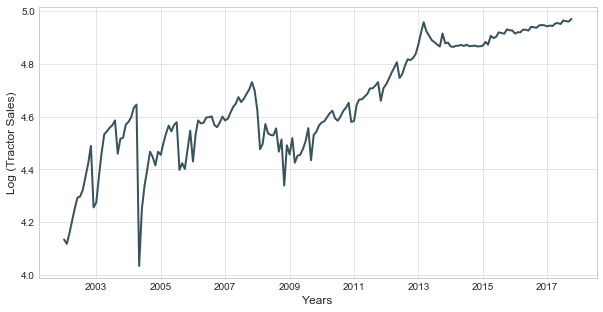

In [205]:
plt.figure(figsize=(10, 5))
plt.plot(np.log10(preco))
plt.xlabel('Years')
plt.ylabel('Log (Tractor Sales)')

Text(0,0.5,'Differenced Log (Tractor Sales)')

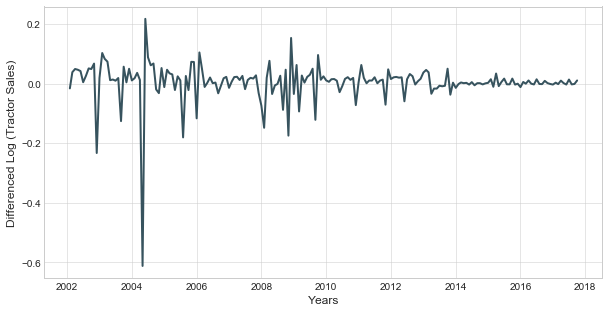

In [206]:
plt.figure(figsize=(10, 5))
plt.plot(np.log10(preco).diff(periods=1))
plt.xlabel('Years')
plt.ylabel('Differenced Log (Tractor Sales)')

In [207]:
preco_log = np.log10(preco)
preco_log.dropna(inplace=True)

preco_log_diff = preco_log.diff(periods=1)
preco_log_diff.dropna(inplace=True)

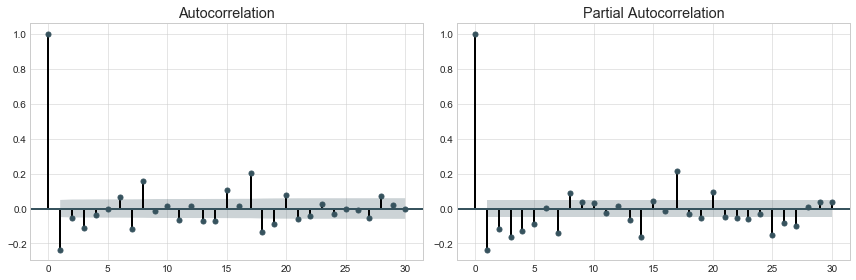

In [208]:
fig, axes = plt.subplots(1, 2, sharey=False, sharex=False)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(preco_log_diff, lags=30, ax=axes[0], alpha=0.5)
smt.graphics.plot_pacf(preco_log_diff, lags=30, ax=axes[1], alpha=0.5)
plt.tight_layout()

In [209]:
# Definir os parâmetros p, d e q para tomar qualquer valor entre 0 e 2
p = d = q = range(0, 2)

# Gerar todas as combinações diferentes de trigêmeas p, d e q
pdq = list(itertools.product(p, d, q))

# Gerar todas as diferentes combinações de trigêmeas sazonais, q e q
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [210]:
import sys
warnings.filterwarnings("ignore")

best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        
        try:
            temp_model = sm.tsa.statespace.SARIMAX(preco_log,
                                             order = param,
                                             seasonal_order = param_seasonal,
                                             enforce_stationarity=True,
                                             enforce_invertibility=True)
            results = temp_model.fit()

            # print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            #print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

Best SARIMAX(1, 1, 1)x(0, 0, 0, 12)12 model - AIC:-502.08282596273466


In [211]:
best_model = sm.tsa.statespace.SARIMAX(preco_log,
                                      order=(0, 1, 1),
                                      seasonal_order=(1, 0, 1, 12),
                                      enforce_stationarity=True,
                                      enforce_invertibility=True)
best_results = best_model.fit()

In [212]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                                 Statespace Model Results                                 
Dep. Variable:                  lowest_deal_price   No. Observations:                  190
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                 251.593
Date:                            Thu, 22 Feb 2018   AIC                           -495.185
Time:                                    03:48:43   BIC                           -482.197
Sample:                                01-01-2002   HQIC                          -489.924
                                     - 10-01-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3276      0.081     -4.040      0.000      -0.487      -0.169
ar.S.L12       0.4851      2.156   

In [213]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('2012-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

In [214]:
# Extract the predicted and true values of our time series
preco_forecasted = pred_dynamic.predicted_mean
preco_truth = preco_log['2012-01-01':]

# Compute the mean square error
mse = ((preco_forecasted - preco_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 4)))

The Mean Squared Error of our forecasts is 0.0425


In [216]:
# Obter uma previsão de 36 etapas (3 anos) no futuro
n_steps = 36
pred_uc_99 = best_results.get_forecast(steps=36, alpha=0.01) # alpha=0.01 signifies 99% confidence interval
pred_uc_95 = best_results.get_forecast(steps=36, alpha=0.05) # alpha=0.05 95% CI

# Obter intervalos de confiança 95% e 99% das previsões
pred_ci_99 = pred_uc_99.conf_int()
pred_ci_95 = pred_uc_95.conf_int()

In [217]:
n_steps = 36
idx = pd.date_range(preco.index[-1], periods=n_steps, freq='MS')
fc_95 = pd.DataFrame(np.column_stack([np.power(10, pred_uc_95.predicted_mean), np.power(10, pred_ci_95)]), 
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])
fc_99 = pd.DataFrame(np.column_stack([np.power(10, pred_ci_99)]), 
                     index=idx, columns=['lower_ci_99', 'upper_ci_99'])
fc_all = fc_95.combine_first(fc_99)
fc_all = fc_all[['forecast', 'lower_ci_95', 'upper_ci_95', 'lower_ci_99', 'upper_ci_99']] # just reordering columns
fc_all.head()

,forecast,lower_ci_95,upper_ci_95,lower_ci_99,upper_ci_99
2017-10-01,92799.272857,69553.026364,123814.958067,69553.026364,123814.958067
2017-11-01,92786.744191,65551.657973,131337.332475,65551.657973,131337.332475
2017-12-01,92853.136423,62372.595774,138229.054550,62372.595774,138229.054550
2018-01-01,92731.006742,59566.337152,144360.724909,59566.337152,144360.724909
2018-02-01,92738.044904,57200.822262,150353.519974,57200.822262,150353.519974


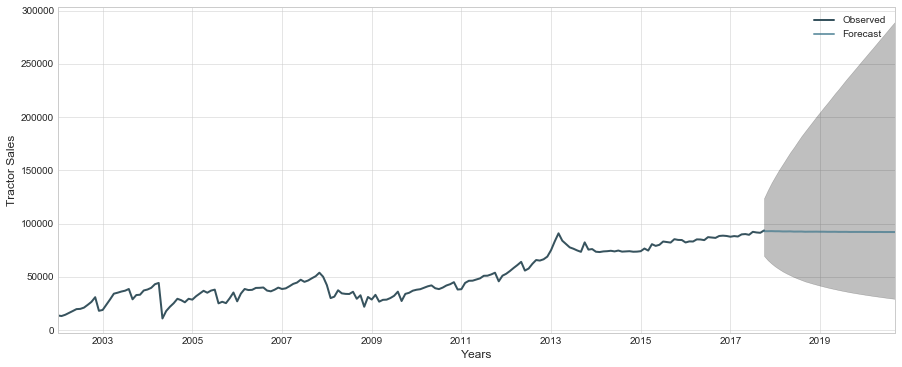

In [220]:
# traça a previsão junto com a banda de confiança
axis = preco.plot(label='Observed', figsize=(15, 6))
fc_all['forecast'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(fc_all.index, fc_all['lower_ci_95'], fc_all['upper_ci_95'], color='k', alpha=.25)
#axis.fill_between(fc_all.index, fc_all['lower_ci_99'], fc_all['upper_ci_99'], color='k', alpha=.75)
axis.set_xlabel('Years')
axis.set_ylabel('Tractor Sales')
plt.legend(loc='best')
plt.show()

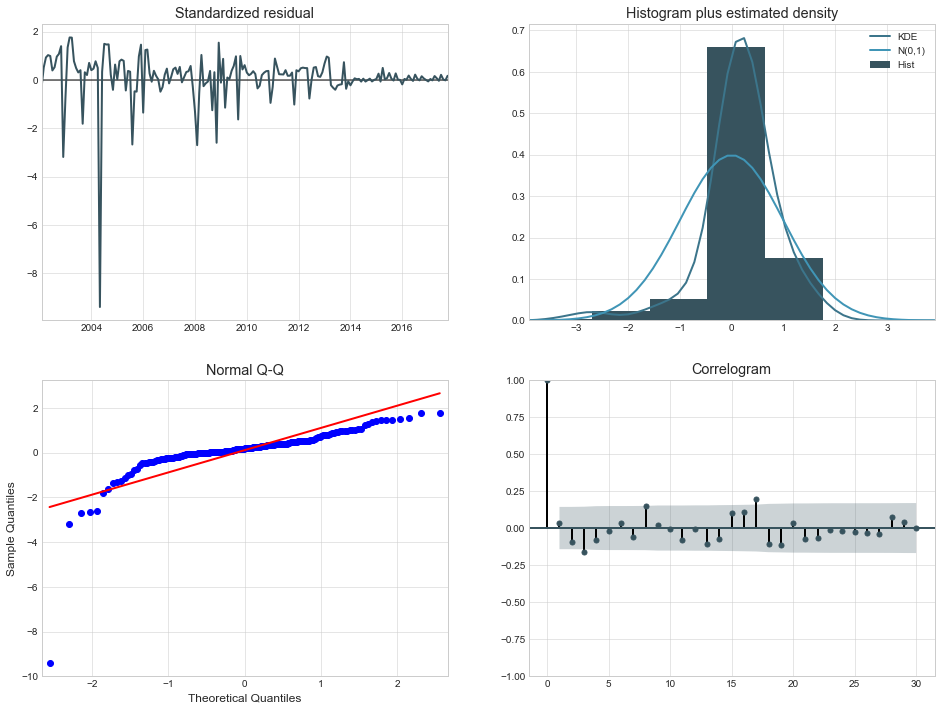

In [221]:
best_results.plot_diagnostics(lags=30, figsize=(16,12))
plt.show()

# Referências:

https://www.kaggle.com/bogof666/shanghai-car-license-plate-auction-price/data

https://www.kaggle.com/bazingasu/shanghai-license-plate-bidding-price-prediction/data

http://deeplearningbook.com.br/capitulo-9-a-arquitetura-das-redes-neurais/

https://www.analyticsvidhya.com/blog/2018/02/time-series-forecasting-methods/

https://codeburst.io/jupyter-notebook-tricks-for-data-science-that-enhance-your-efficiency-95f98d3adee4

https://towardsdatascience.com/why-you-should-forget-for-loop-for-data-science-code-and-embrace-vectorization-696632622d5f

https://towardsdatascience.com/10-machine-learning-algorithms-you-need-to-know-77fb0055fe0

http://www.cbcity.de/timeseries-decomposition-in-python-with-statsmodels-and-pandas

https://bibliotecadigital.ipb.pt/bitstream/10198/12709/1/Artur%20Jorge%20Ferreira%20da%20Costa%20Dias.pdf

http://www.redalyc.org/pdf/3291/329147536007.pdf

http://www.ceel.eletrica.ufu.br/artigos/ceel2016_artigo094_r01.pdf

https://repositorio.bc.ufg.br/tede/bitstream/tede/7563/5/Disserta%C3%A7%C3%A3o%20-%20Ricardo%20Henrique%20Fonseca%20Alves%20-%202017.pdf

http://ftp.cptec.inpe.br/labren/publ/teses/DISSERTACAO_RICARDO-GUARNIERI.pdf

http://www.confea.org.br/media/contecc2017/eletrica/1_audrnanpdrsg.pdf

http://www.inovarse.org/sites/default/files/T14_0291_5.pdf

http://www.redalyc.org/html/3291/329147536007/

https://repositorio.ufu.br/handle/123456789/14569

https://repositorio.ufsc.br/bitstream/handle/123456789/178026/TCC_Final_Jhuan_Souza.pdf?sequence=1&isAllowed=y

https://www.producaoonline.org.br/rpo/article/view/2542/1596

revistas.ufpr.br/rber/article/download/48431/pdf

https://pt.stackoverflow.com/questions/192098/como-funciona-uma-rede-neural-artificial

https://martin-thoma.com/classification-with-pybrain/

http://conteudo.icmc.usp.br/pessoas/andre/research/neural/

http://www.din.uem.br/ia/neurais/

http://www.cerebromente.org.br/n05/tecnologia/rna.htm

ftp://ftp.dca.fee.unicamp.br/pub/docs/vonzuben/ia006_03/topico5_03.pdf

http://www2.dbd.puc-rio.br/pergamum/tesesabertas/0016231_04_cap_05.pdf

https://www.embarcados.com.br/redes-neurais-artificiais-introducao/

https://periodicos.utfpr.edu.br/recit/article/view/4330/Leandro

http://www2.ica.ele.puc-rio.br/Downloads/33/ICA-introdu%C3%A7%C3%A3o%20RNs.pdf

http://www.scielo.br/scielo.php?script=sci_arttext&pid=S1982-21702017000100150&lng=pt&tlng=pt

http://www.scielo.br/scielo.php?pid=S1678-86212017000300103&script=sci_arttext

https://www.analyticsvidhya.com/blog/2015/12/complete-tutorial-time-series-modeling/

https://www.monolitonimbus.com.br/processos-estacionarios/

https://www.analyticsvidhya.com/blog/2015/12/complete-tutorial-time-series-modeling/

http://www.portalaction.com.br/series-temporais/11-estacionariedade

http://www.icad.puc-rio.br/cfeijo/pdf/revis%C3%A3o%20b%C3%A1sica%20s%C3%A9ries%20temporais_material%20de%20apoio_curso%20teoria%20macroeconomica_PPGE%20UFF.pdf

https://www.ime.unicamp.br/~hlachos/MaterialSeries.pdf

http://www.inf.ufsc.br/~marcelo.menezes.reis/Cap4.pdf

https://www.researchgate.net/publication/229040330_JTIMESAT_uma_ferramenta_para_a_visualizacao_de_series_temporais_de_imagens_de_satelite

http://bdm.unb.br/bitstream/10483/7239/1/2013_JoseRobertoGoncalvesdeRezendeFilho.pdf

https://www.maxwell.vrac.puc-rio.br/16824/16824_4.PDF

https://www.maxwell.vrac.puc-rio.br/24787/24787_4.PDF

http://conteudo.icmc.usp.br/pessoas/ehlers/stemp/stemp.pdf

http://cdsid.org.br/sbpo2015/wp-content/uploads/2015/08/140250.pdf

https://www.marinha.mil.br/spolm/sites/www.marinha.mil.br.spolm/files/101711_0.pdf

https://www.lume.ufrgs.br/bitstream/handle/10183/31034/000782115.pdf?sequence=1

http://www2.ufersa.edu.br/portal/view/uploads/setores/232/TCC%20-%20VALCIANO%20CAMILO%20GURGEL.pdf

http://www.scielo.br/scielo.php?script=sci_arttext&pid=S1982-21702017000100150&lng=pt&tlng=pt

http://www.ime.eb.br/arquivos/teses/se4/mec2008/2008Bianca.pdf

http://repositorio.unicamp.br/bitstream/REPOSIP/267746/1/Conti_JoseCarlos_M.pdf

http://www.ctec.ufal.br/professor/cfs/Sul_Sud06%20-%20Series.pdf

http://pdf.blucher.com.br.s3-sa-east-1.amazonaws.com/marineengineeringproceedings/spolm2015/140011.pdf

http://www.portalaction.com.br/series-temporais/15-modelos-para-series-temporais

http://www.scielo.br/scielo.php?pid=S1678-86212017000300103&script=sci_arttext

https://www.researchgate.net/publication/289479535_Previsao_de_energia_eletrica_modelagem_e_uso_de_combinacoes_de_previsoes

https://www.ufrgs.br/sbai17/papers/paper_506.pdf

http://www.scielo.org.co/pdf/eia/n26/en_n26a09.pdf

http://www.sciencedirect.com/science/article/pii/S1877050915015641

http://www.uff.br/engevista/seer/index.php/engevista/article/viewFile/433/236

http://www.ufjf.br/pgmc/files/2011/05/Disserta%C3%A7%C3%A3o-Guilherme-G-Neto-18-08.pdf

http://www.exatas.ufpr.br/portal/degraf_paulo/wp-content/uploads/sites/4/2014/09/EE022-08-08.pdf

http://www.datascienceinstitute.com.br/forecast-de-consumo-de-energia-eletrica/

https://docs.microsoft.com/pt-br/azure/machine-learning/preview/scenario-time-series-forecasting

https://translate.google.com.br/translate?sl=en&tl=pt&js=y&prev=_t&hl=pt-BR&ie=UTF-8&u=http%3A%2F%2Fwww.scielo.br%2Fscielo.php%3Fscript%3Dsci_arttext%26pid%3DS1678-86212017000300103%26lng%3Dpt%26tlng%3Dpt&edit-text=

http://www.scielo.br/scielo.php?script=sci_arttext&pid=S1678-86212017000300103&lng=pt&tlng=pt

http://acervo.ufvjm.edu.br/jspui/bitstream/1/1327/1/rodrigo_magalhaes_mota_santos.pdf

http://tede2.pucgoias.edu.br:8080/bitstream/tede/2484/1/Paulo%20Henrique%20Borba%20Florencio.pdf

http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.29.4455&rep=rep1&type=pdf

https://gab41.lab41.org/the-10-algorithms-machine-learning-engineers-need-to-know-f4bb63f5b2fa

http://minerandodados.com.br/index.php/2017/05/19/prevendo-precos-de-acoes-da-bolsa-de-valores-com-machine-learning/

https://fga.unb.br/articles/0000/5556/TCC_Hialo_Muniz.pdf

http://www.feis.unesp.br/Home/departamentos/engenhariaeletrica/pos-graduacao/327-dissertacao_ciceromarcelo.pdf

https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/

https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/

http://www.semantix.com.br/10-algoritmos-de-machine-learning/

http://www.scielo.br/scielo.php?pid=S1678-86212017000300103&script=sci_arttext

https://fga.unb.br/articles/0000/7804/TCC_Hialo_Muniz.pdf

http://www.leec.eco.br/downloads/R-tutorial-de-bolso.pdf